In [1]:
import ga4beamlines as ga4b

Imported!
I've been imported!


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
#from matplotlib import rcParams, cycler

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import os

## Initial Parameters

In [4]:
nGenerations = 500
critVal = 0.9
startPop = None

In [5]:
popSize = 100
nElite = 10
alpha = 0.75
s = 1.5

In [6]:
numRuns = 10

In [7]:
'''
motors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m2", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m3", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m4", "lo": -10, "hi": 5, "sigma": .1},
          {"name": "m5", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m6", "lo": -5, "hi": 8, "sigma": .1},
          {"name": "m7", "lo": 0, "hi": 10, "sigma": .1},
          {"name": "m8", "lo": -10, "hi": 10, "sigma": .1}]
'''

'\nmotors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m2", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m3", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m4", "lo": -10, "hi": 5, "sigma": .1},\n          {"name": "m5", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m6", "lo": -5, "hi": 8, "sigma": .1},\n          {"name": "m7", "lo": 0, "hi": 10, "sigma": .1},\n          {"name": "m8", "lo": -10, "hi": 10, "sigma": .1}]\n'

In [8]:
'''
motors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m2", "lo": -5, "hi": 5, "sigma": 1.5},
          {"name": "m3", "lo": -5, "hi": 5, "sigma": 0.5},
          {"name": "m4", "lo": -10, "hi": 5, "sigma": 2},
          {"name": "m5", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m6", "lo": -5, "hi": 8, "sigma": 1.25},
          {"name": "m7", "lo": 0, "hi": 10, "sigma": 2},
          {"name": "m8", "lo": -10, "hi": 10, "sigma": 3}]
'''

'\nmotors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": 1},\n          {"name": "m2", "lo": -5, "hi": 5, "sigma": 1.5},\n          {"name": "m3", "lo": -5, "hi": 5, "sigma": 0.5},\n          {"name": "m4", "lo": -10, "hi": 5, "sigma": 2},\n          {"name": "m5", "lo": -5, "hi": 5, "sigma": 1},\n          {"name": "m6", "lo": -5, "hi": 8, "sigma": 1.25},\n          {"name": "m7", "lo": 0, "hi": 10, "sigma": 2},\n          {"name": "m8", "lo": -10, "hi": 10, "sigma": 3}]\n'

In [9]:
motors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m2", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m3", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m4", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m5", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m6", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m7", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m8", "lo": -5, "hi": 5, "sigma": 1}]

In [10]:
testSMode = ga4b.sMode[0]
testPMode = ga4b.pMode[0]
testCXMode = ga4b.cxMode[0]
testMMode = ga4b.mMode[0]
testFMode = ga4b.fMode[0]

## Plotting Functions

In [11]:
def PlotResults(pop):
    plt.plot(pop.fitHistory.loc[:, "aveFitness":"peakFitness"])
    plt.title(
    f"""Fitness History of Population\nSurvivor Method: {pop.sSel['name']}, Num. Elite: {pop.sSel['nElite']}
    Parent Method: {pop.pSel['name']}, S: {pop.pSel['s']}
    Child Method: {pop.cxMode['name']}, Alpha: {pop.cxMode['alpha']}
    Mutation Method: {pop.mMode['name']}
    Population Size: {pop.nPop}""")
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.legend(pop.fitHistory, loc = "upper right", title="Runs")
    plt.tight_layout()
    plt.show()

In [12]:
def PlotMultRuns(pop, generations, runs):
    startPop = pop.population
    multirunDF = pd.DataFrame(index = [i for i in range(nGenerations)])
    
    for i in range(runs):
        label = f"Run {i} Average Fitness"
        pop.population = startPop
        pop.generation = 0
        pop.fitHistory = pd.DataFrame({"aveFitness": [], "peakFitness": [], "peakParameters": []})
        
        pop.FirstGeneration() 

        print(f'Starting Conditions: {pop.fitHistory["peakFitness"][pop.generation - 1].tolist()}')

        while pop.fitHistory["peakFitness"][pop.generation - 1] < critVal and pop.generation < nGenerations:
            pop.NextGeneration()
              
        print(f'Final Conditions: {pop.fitHistory["peakFitness"][pop.generation - 1].tolist()}\n')
        
        multirunDF[label] = pop.fitHistory["aveFitness"]
        label = f"Run {i} Peak Fitness"     
        multirunDF[label] = pop.fitHistory["peakFitness"]
              
    plt.plot(multirunDF)
    plt.title(
    f"""Comparison of {runs} Runs\nSurvivor Method: {pop.sSel['name']}, Num. Elite: {pop.sSel['nElite']}
    Parent Method: {pop.pSel['name']}, S: {pop.pSel['s']}
    Child Method: {pop.cxMode['name']}, Alpha: {pop.cxMode['alpha']}
    Mutation Method: {pop.mMode['name']}
    Population Size: {pop.nPop}""")
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.legend(multirunDF, loc = "center left", bbox_to_anchor=(1, 0.5), title="Runs")
    plt.tight_layout()
    plt.show()

In [13]:
def ProgressBar(currVal, maxVal):
    perc = currVal / maxVal
          
    if perc >= 1.0:
        print(f"\rProgress: [{'#' * int(perc * 10) + ' ' * (10 - int(perc * 10))}] ({round(100.0 * perc, 1)} %)")
    else:
        print(f"\rProgress: [{'#' * int(perc * 10) + ' ' * (10 - int(perc * 10))}] ({round(100.0 * perc, 1)} %)", end = "")

In [14]:
def PlotDiffPops(numInitial, runs, generations, motors, sMode, pMode, cMode, mMode, fit, numPop,
                 mkCSV = True, mkPickle = True, cmap = plt.cm.tab10):
    #Stores the data that will be saved to the csv and/or pickle file
    csvDF = pd.DataFrame(columns = ["aveFitness", "peakFitness", "peakParameters", "generation"], 
                         index = [i for i in range(numInitial * runs)])
    
    #Store Data for Each Population
    popPeakDF = pd.DataFrame(index = [i for i in range(generations)])
    popAvgDF = pd.DataFrame(index = [i for i in range(generations)])
    
    #Stores the Data that will be Plotted in the End
    avePeakDF = pd.DataFrame(index = [i for i in range(generations)])
    aveAveDF = pd.DataFrame(index = [i for i in range(generations)])
        
    for i in range(numInitial):
        print(f"\npopulation #{i}")
        p = ga4b.GA4Beamline(motors = motors, 
                             survivorMode = sMode, 
                             parentMode = pMode, 
                             cxMode = cMode, 
                             mutationMode = mMode, 
                             fitness = fit,
                             nPop = numPop)
        startPop = p.population
        
        for j in range(runs):
            #print(f"In run {j} ", end = "")
            ProgressBar(j, runs)
            
            p.population = startPop
            p.generation = 0
            p.fitHistory = pd.DataFrame({"aveFitness": [], "peakFitness": [], "peakParameters": []})

            p.FirstGeneration() 

            #print(f'Starting Conditions: {p.fitHistory["peakFitness"][p.generation - 1].tolist()}')

            while p.fitHistory["peakFitness"][p.generation - 1] < critVal and p.generation < nGenerations:
                p.NextGeneration()

            #print(f'Final Conditions: {p.fitHistory["peakFitness"][p.generation - 1].tolist()}\n')
            tmp = p.fitHistory.iloc[p.generation - 1, :].tolist()
            tmp.append(p.generation)
                  
            csvDF.iloc[i * runs + j:,:] = tmp
            sublabel = f"Run {j} Average Fitness"
            popAvgDF[sublabel] = p.fitHistory["aveFitness"]
            sublabel = f"Run {j} Peak Fitness"
            popPeakDF[sublabel] = p.fitHistory["peakFitness"]
        ProgressBar(runs, runs)
                            
        label = f"Pop. {i}'s Avg. Avg. Fitness"
        aveAveDF[label] = [popAvgDF.iloc[i, :].mean() for i in range(len(popAvgDF.index))]
                  
        label = f"Pop. {i}'s Avg. Peak Fitness"
        avePeakDF[label] = [popPeakDF.iloc[i, :].mean() for i in range(len(popPeakDF.index))]
                  
        popPeakDF = pd.DataFrame(index = [i for i in range(generations)])
        popAvgDF = pd.DataFrame(index = [i for i in range(generations)])
                
        #print(f"aveDF is:\n{aveDF}")
    
    #Save Data to a .csv file and/or a .pkl file
    fileName = f"{sMode['name']}{sMode['nElite']}_{pMode['name']}{pMode['s']}_{cMode['name']}{cMode['alpha']}_{mMode['name']}_PopS{numPop}_Gens{generations}_InitPop{numInitial}_RunsEach{runs}"
    csvDirName = os.path.join(os.getcwd(), "csv")
    pklDirName = os.path.join(os.getcwd(), "pickle")
    
    if not os.path.exists(csvDirName) and mkCSV:
        os.makedirs(csvDirName)
        
    if not os.path.exists(pklDirName) and mkPickle:
        os.makedirs(pklDirName)

    if mkCSV:
        csvName = os.path.join(csvDirName, fileName + ".csv")
        csvDF.to_csv(path_or_buf = csvName)
    
    if mkPickle:
        pklName = os.path.join(pklDirName, fileName + ".pkl")
        csvDF.to_pickle(path = pklName)
        
    
    #cmap = plt.cm.Set2
    colors = [cmap(i) for i in np.linspace(0, 1, numInitial)]
    
    for i, color in enumerate(colors, start = 0):
        plt.plot(avePeakDF.iloc[:, i], "--", aveAveDF.iloc[:, i], "-", color = color)    
    
    plt.title(
    f"""Comparison of the Performance of the GA Algorithm with {numInitial} Different Starting Populations\n
    Average Performance of {runs} Runs Each
    Survivor Method: {p.sSel['name']}, Num. Elite: {p.sSel['nElite']}
    Parent Method: {p.pSel['name']}, S: {p.pSel['s']}
    Child Method: {p.cxMode['name']}, Alpha: {p.cxMode['alpha']}
    Mutation Method: {p.mMode['name']}
    Population Size: {p.nPop}""")
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    
    plt.axis(xmin = -5.0, xmax = generations + 5, ymin = 0.0, ymax = 1.0)
    
    legendElements = [plt.Line2D([0], [0], color='k', ls = "--", lw=2),
                      plt.Line2D([0], [0], color='k', ls = "-", lw=2)]
                      
    #plt.legend(legendElements, ["Avg. Peak", "Avg. Avg."], loc = "center left", bbox_to_anchor=(1.05, 0.5), title="Line Types")
    plt.legend(legendElements, ["Avg. Peak", "Avg. Avg."], loc = "lower right", title="Line Types")

    
    #plt.legend(aveDF, loc = "center left", bbox_to_anchor=(1.05, 0.5), title="Populations")
    
    
    plt.tight_layout()
    plt.show()

In [31]:
def PlotScatterMatrix(motors, df, minLim = -1.0, maxLim = 1.0, title = ''):
    '''
    This assumes that df has similar columns as fitHistory and that there are 8 motors being examined.
    '''
    motorDict = {}

    for motor in motors:
        motorDict[motor["name"]] = []

    for row in range(len(df.index)):
        for column, mName in enumerate(motorDict, start = 0):
            motorDict[mName].append(df["peakParameters"][row][column])

    motorDF = pd.DataFrame(motorDict)
    
    '''
    minimum = round(np.min(motorDF.min(axis = 0).tolist()), 1)
    maximum = round(np.max(motorDF.max(axis = 0).tolist()), 1)
    print((minimum, maximum))
    '''
    
    axS = scatter_matrix(motorDF, alpha = 0.2, figsize = (6,6), diagonal = 'hist')

    for i in range(len(motors)):
        for j in range(len(motors)):
            axS[i,j].set_xlim(minLim, maxLim)
            if i != j:
                 axS[i,j].set_ylim(minLim, maxLim)

    plt.suptitle(title)
    plt.show()

In [16]:
def PlotCompMethods(runs, generations, motors, survMode, parMode, cxMode, mutMode, fitMode, numPop,
                 mkCSV = True, mkPickle = True, cmap = plt.cm.tab10):
    #In this case, sMode, pMode, cMode, and mMode should be lists of all methods to combine and compare
    
    numCombos = len(sMode) * len(pMode) * len(cMode) * len(mMode) * len(fit)
    
    #Stores the data that will be saved to the csv and/or pickle file
    csvDF = pd.DataFrame(columns = ["aveFitness", "peakFitness", "peakParameters", "generation"], 
                         index = [i for i in range(numCombos * runs)])
    
    #Store Data for Each Population
    popPeakDF = pd.DataFrame(index = [i for i in range(generations)])
    popAvgDF = pd.DataFrame(index = [i for i in range(generations)])
    
    #Stores the Data that will be Plotted in the End
    avePeakDF = pd.DataFrame(index = [i for i in range(generations)])
    aveAveDF = pd.DataFrame(index = [i for i in range(generations)])
        
    for a in range(len(survMode)):
        sMode = survMode[a]
        aContr = len(parMode) * len(cxMode) * len(mutMode) * len(fitMode)
        
        for b in range(len(parMode)):
            pMode = parMode[b]
            bContr = len(cxMode) * len(mutMode) * len(fitMode)
            
            for c in range(len(cxMode)):
                cMode = cxMode[c]
                cContr = len(mutMode) * len(fitMode)
                
                for d in range(len(mutMode)):
                    mMode = mutMode[d]
                    dContr = len(fitMode)
                    
                    for e in range(len(fitMode)):
                        fit = fitMode[e]
                        
                        comboNum = a * aContr + b * bContr + c * cContr + d * dContr + e
                        ProgressBar(comboNum, numCombos)
                        
                        print(f"\Current Combination #{comboNum}")
                        p = ga4b.GA4Beamline(motors = motors, 
                                             survivorMode = sMode, 
                                             parentMode = pMode, 
                                             cxMode = cMode, 
                                             mutationMode = mMode, 
                                             fitness = fit,
                                             nPop = numPop)
                        startPop = p.population

                        for j in range(runs):
                            p.population = startPop
                            p.generation = 0
                            p.fitHistory = pd.DataFrame({"aveFitness": [], "peakFitness": [], "peakParameters": []})

                            p.FirstGeneration() 

                            while p.fitHistory["peakFitness"][p.generation - 1] < critVal and p.generation < nGenerations:
                                p.NextGeneration()

                            tmp = p.fitHistory.iloc[p.generation - 1, :].tolist()
                            tmp.append(p.generation)

                            csvDF.iloc[i * runs + j:,:] = tmp
                            sublabel = f"Run {j} Average Fitness"
                            popAvgDF[sublabel] = p.fitHistory["aveFitness"]
                            sublabel = f"Run {j} Peak Fitness"
                            popPeakDF[sublabel] = p.fitHistory["peakFitness"]
        ProgressBar(numCombos, numCombos)
                            
        label = f"Pop. {i}'s Avg. Avg. Fitness"
        aveAveDF[label] = [popAvgDF.iloc[i, :].mean() for i in range(len(popAvgDF.index))]
                  
        label = f"Pop. {i}'s Avg. Peak Fitness"
        avePeakDF[label] = [popPeakDF.iloc[i, :].mean() for i in range(len(popPeakDF.index))]
                  
        popPeakDF = pd.DataFrame(index = [i for i in range(generations)])
        popAvgDF = pd.DataFrame(index = [i for i in range(generations)])
        
    
    #Save Data to a .csv file and/or a .pkl file
    fileName = f"all{nElite}_all{s}_all{alpha}_{mMode}_PopS{numPop}_Gens{generations}_RunsEach{runs}"
    csvDirName = os.path.join(os.getcwd(), "csv")
    pklDirName = os.path.join(os.getcwd(), "pickle")
    
    if not os.path.exists(csvDirName) and mkCSV:
        os.makedirs(csvDirName)
        
    if not os.path.exists(pklDirName) and mkPickle:
        os.makedirs(pklDirName)

    if mkCSV:
        csvName = os.path.join(csvDirName, fileName + ".csv")
        csvDF.to_csv(path_or_buf = csvName)
    
    if mkPickle:
        pklName = os.path.join(pklDirName, fileName + ".pkl")
        csvDF.to_pickle(path = pklName)
        
    colors = [cmap(i) for i in np.linspace(0, 1, numCombos)]
    
    for i, color in enumerate(colors, start = 0):
        plt.plot(avePeakDF.iloc[:, i], "--", aveAveDF.iloc[:, i], "-", color = color)    
    
    plt.title(
    f"""Comparison of the Performance of the GA Algorithm with {numCombos} Different Method Combinations\n
    Average Performance of {runs} Runs Each
    Survivor Method: {p.sSel['name']}, Num. Elite: {p.sSel['nElite']}
    Parent Method: {p.pSel['name']}, S: {p.pSel['s']}
    Child Method: {p.cxMode['name']}, Alpha: {p.cxMode['alpha']}
    Mutation Method: {p.mMode['name']}
    Population Size: {p.nPop}""")
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    
    plt.axis(xmin = -5.0, xmax = generations + 5, ymin = 0.0, ymax = 1.0)
    
    legendElements = [plt.Line2D([0], [0], color='k', ls = "--", lw=2),
                      plt.Line2D([0], [0], color='k', ls = "-", lw=2)]
                      
    #plt.legend(legendElements, ["Avg. Peak", "Avg. Avg."], loc = "center left", bbox_to_anchor=(1.05, 0.5), title="Line Types")
    plt.legend(legendElements, ["Avg. Peak", "Avg. Avg."], loc = "lower right", title="Line Types")

    
    #plt.legend(aveDF, loc = "center left", bbox_to_anchor=(1.05, 0.5), title="Populations")
    
    
    plt.tight_layout()
    plt.show()


population #0
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


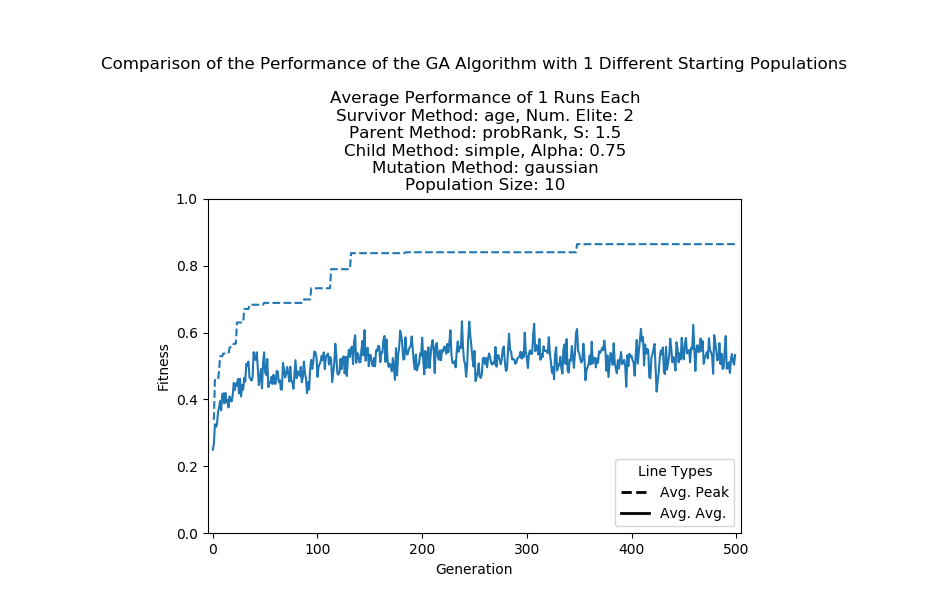

In [53]:
PlotDiffPops(numInitial = 1, runs = 1, generations = 500, motors = motors,
             sMode = {"name": "age", "nElite": 2},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "simple", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = 10)

Age + Elitism Population Configurations

In [13]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [17]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [19]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [21]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [23]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [25]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [27]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [29]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [31]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [33]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [35]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [37]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

Genitor Population Configurations

In [39]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [41]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [43]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [45]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [47]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [49]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [51]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [53]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [55]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [57]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [59]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [61]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": 0}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [14]:
startPop = pop.population

## Graphs to Compare Performance of Different Runs

### Graphs for Combinations of Genitor

#### Gaussian Mutation

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9174414194649785

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9008661334916865

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9208328927903185

Starting Conditions: 0.4275876637736554
Final Conditions: 0.928919934794715

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9076880887635841

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9031702810530667

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9086781877360359

Starting Conditions: 0.4275876637736554
Final Conditions: 0.903775563212595

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9285853688231569

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9075827317289793



<IPython.core.display.Javascript object>


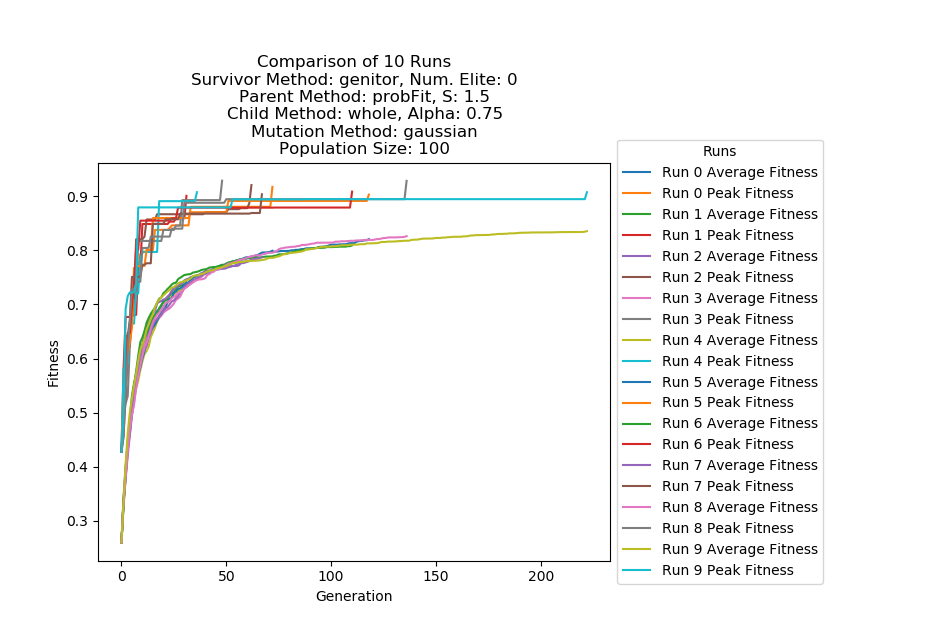

In [62]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9311068443412441

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9071895821068378

Starting Conditions: 0.4275876637736554
Final Conditions: 0.903108836497081

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9129139559818988

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9049985547903223

Starting Conditions: 0.4275876637736554
Final Conditions: 0.906322815418655

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9099281300252702

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9347029162299882

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9110430522389088

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9198432489288344



<IPython.core.display.Javascript object>


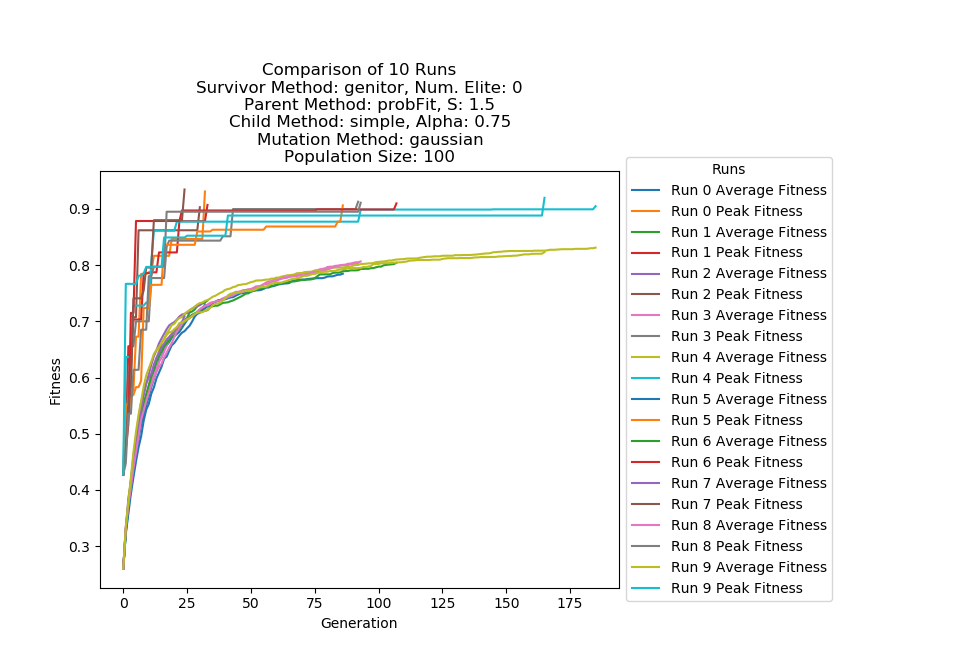

In [58]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.933817857003481

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9360128038196673

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9205074348164789

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9148146616696525

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9184964788309504

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9105298700365143

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9054138102423647

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9033608917535243

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9168387779016278

Starting Conditions: 0.4275876637736554
Final Conditions: 0.947761606665831



<IPython.core.display.Javascript object>


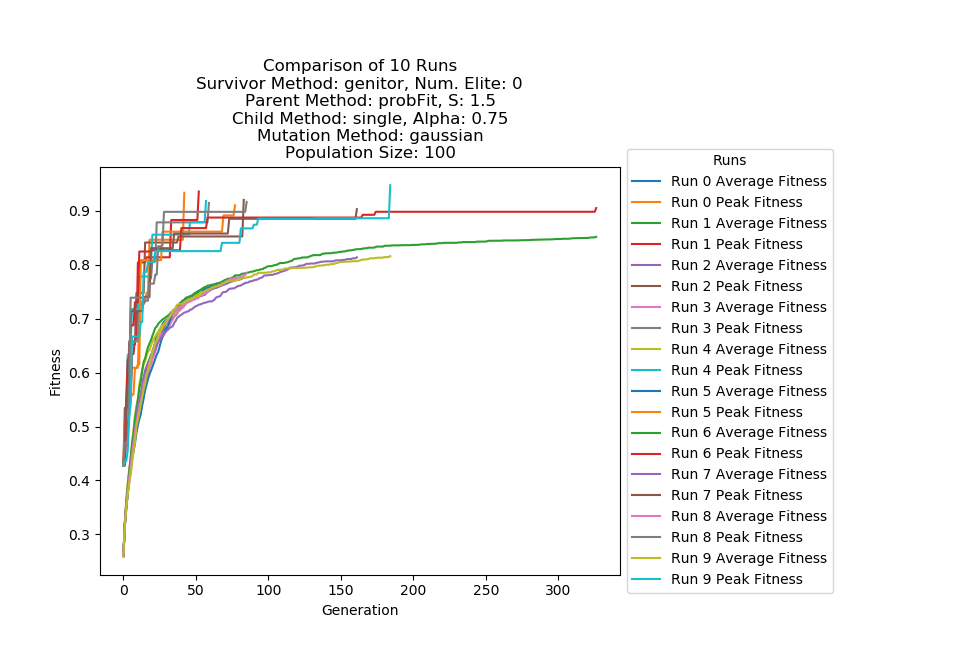

In [54]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9028827582607765

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9040495352036441

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9135193945858753

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9020613684523482

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9157782604937321

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9228028917563208

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9102380096924516

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9022708819798183

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9500988267870195

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9066160637653742



<IPython.core.display.Javascript object>


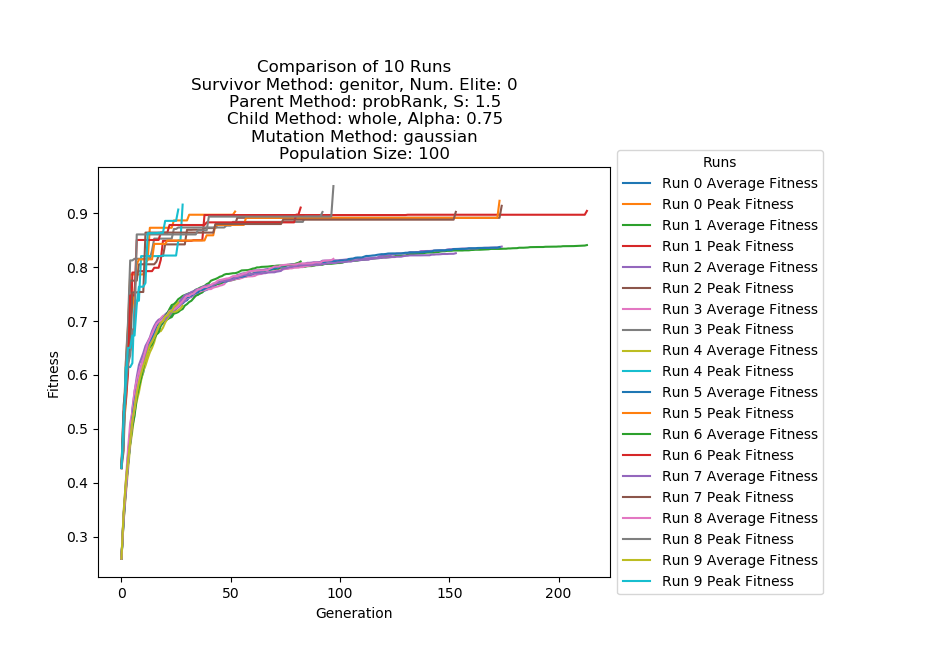

In [50]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.911988916601468

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9181287263943535

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9167683598636274

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9025043798480705

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9289159572205137

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9132365706007686

Starting Conditions: 0.4275876637736554
Final Conditions: 0.916170882808073

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9418235422555036

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9156940028123941

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9199483189494583



<IPython.core.display.Javascript object>


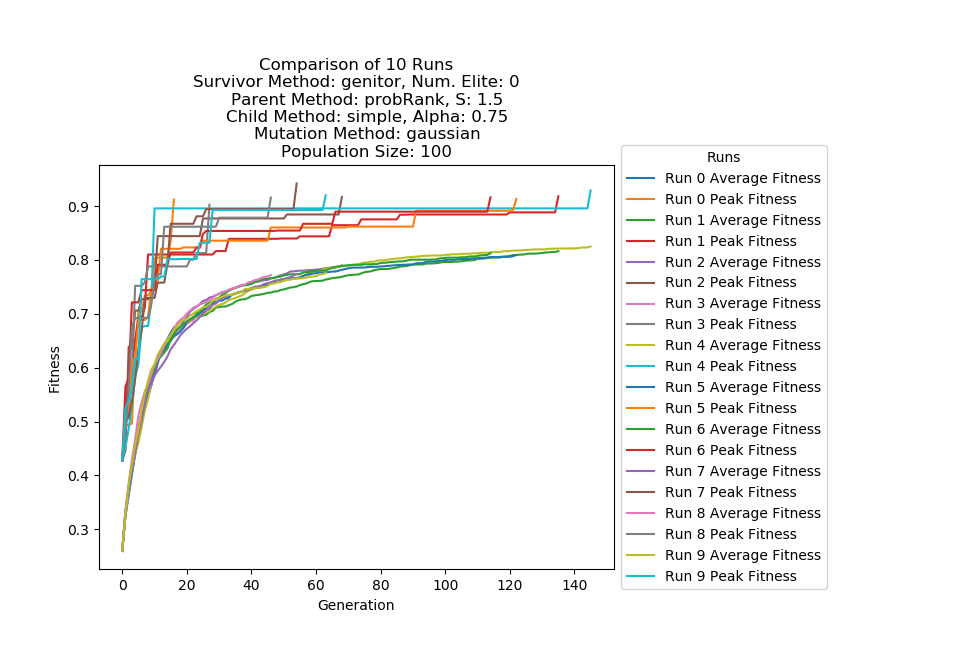

In [46]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9031738373124771

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9011506260449973

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9018277839730551

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9376533732892455

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9360044479354641

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9142563011985203

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9185538928342154

Starting Conditions: 0.4275876637736554
Final Conditions: 0.923697703064623

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9092797519990299

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9050574983535113



<IPython.core.display.Javascript object>


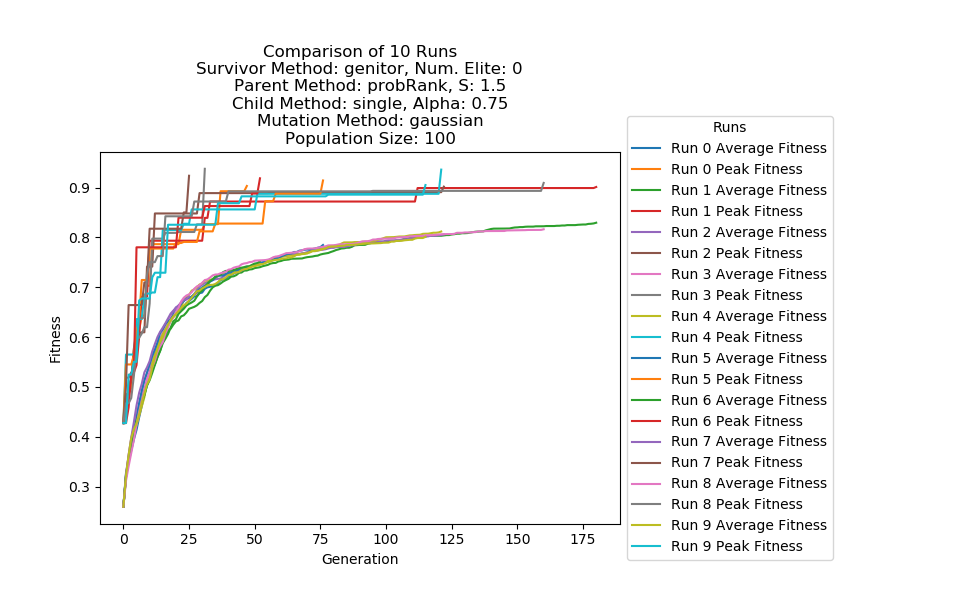

In [42]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

#### Uniform Mutation

Starting Conditions: 0.4275876637736554
Final Conditions: 0.5906353464241776

Starting Conditions: 0.4275876637736554
Final Conditions: 0.67914308510359

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6414419293115295

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6931667896604746

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6619831248290287

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6359955042538185

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6908050033469231

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6603681563913487

Starting Conditions: 0.4275876637736554
Final Conditions: 0.626743231678068

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7320856695157357



<IPython.core.display.Javascript object>


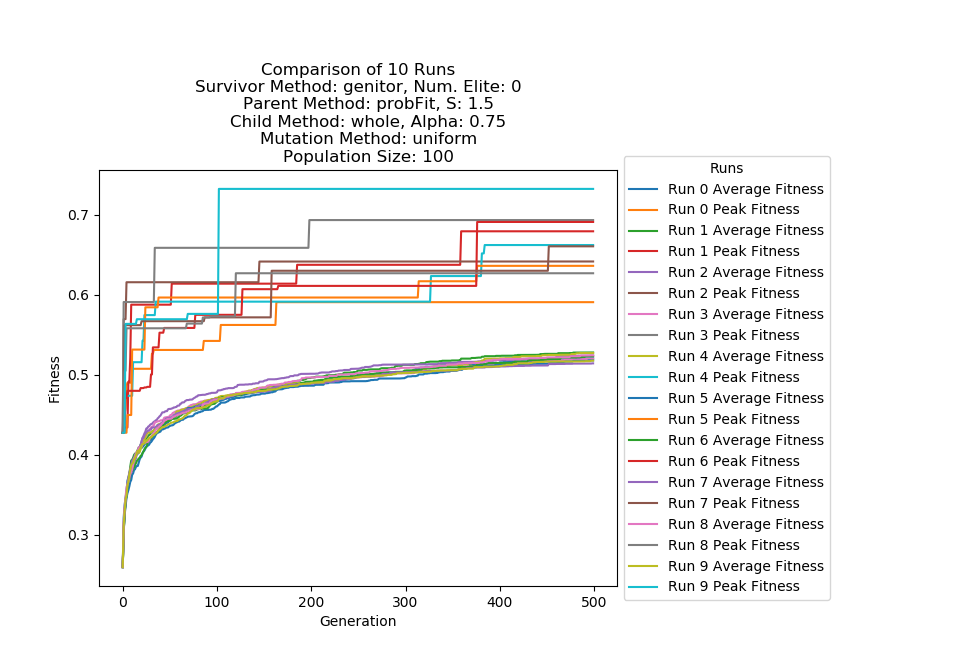

In [60]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6835125743549703

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6193376241727448

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6422222516632707

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6006594582546027

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6563452555286188

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6356377557762548

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6758103749833505

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6580721723991441

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7112691965756952

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7195518055242626



<IPython.core.display.Javascript object>


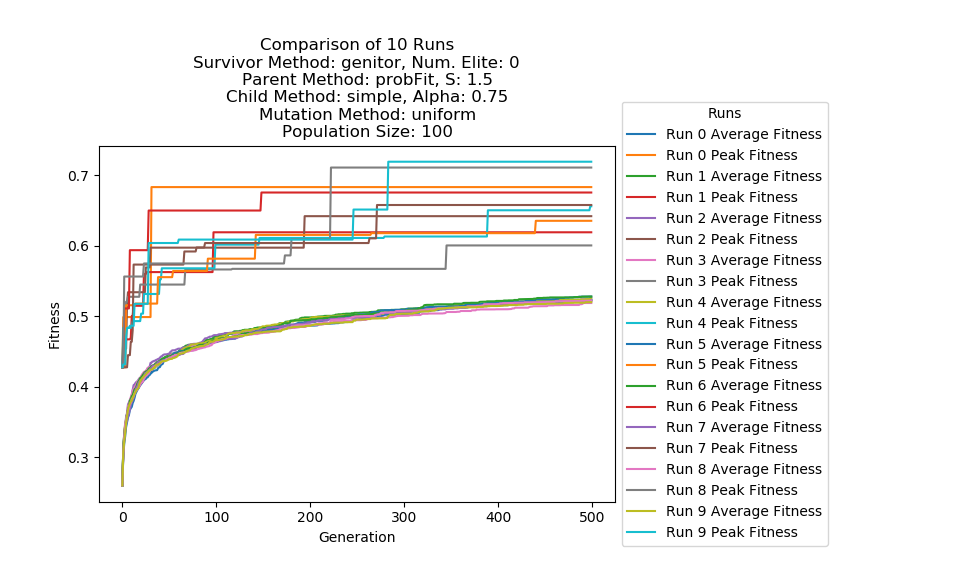

In [56]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.5989497111430834

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6447489144823989

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7078358532387912

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6792065405423112

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6961387432070416

Starting Conditions: 0.4275876637736554
Final Conditions: 0.64732930930049

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6934069239229159

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6517318023242

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7986445133945895

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7115991219071384



<IPython.core.display.Javascript object>


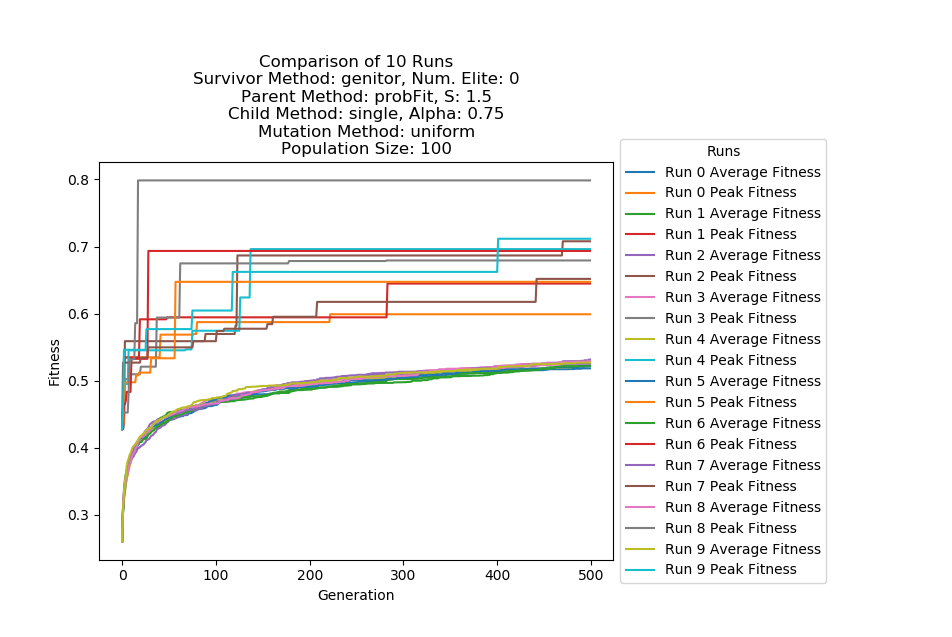

In [52]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6366559064846057

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6759083266922541

Starting Conditions: 0.4275876637736554
Final Conditions: 0.734827013417039

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6458363172753493

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6631089091551835

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6001361325207614

Starting Conditions: 0.4275876637736554
Final Conditions: 0.66898637741256

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7107812782668866

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6595820932866094

Starting Conditions: 0.4275876637736554
Final Conditions: 0.668009017434546



<IPython.core.display.Javascript object>


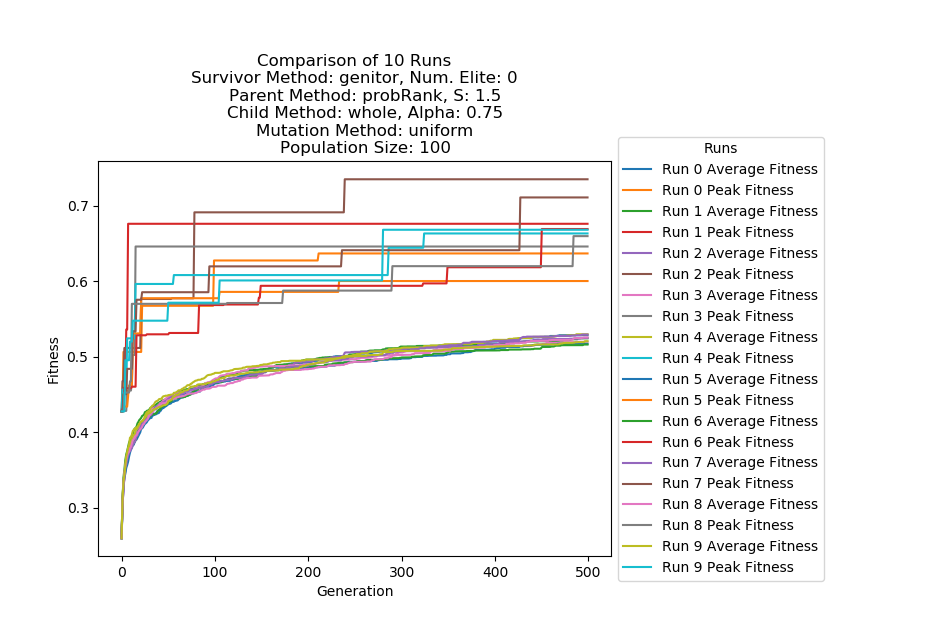

In [48]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6501131843170962

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6502895418610464

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7498734794478568

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6031913973784975

Starting Conditions: 0.4275876637736554
Final Conditions: 0.5983217116326002

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6148109913530212

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6980207913794054

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7206681642087063

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6780046282560138

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6461106185441395



<IPython.core.display.Javascript object>


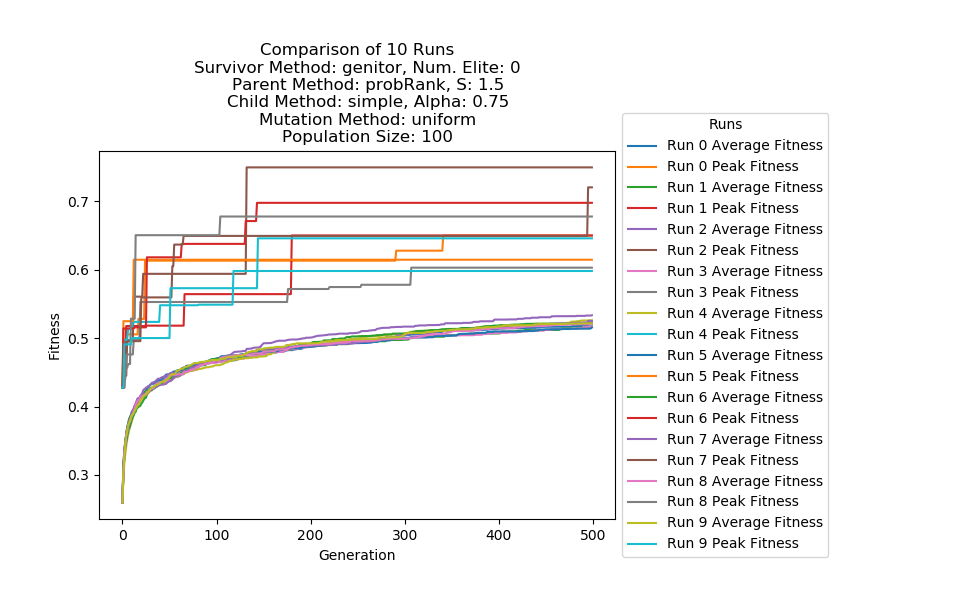

In [44]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7218199735809334

Starting Conditions: 0.4275876637736554
Final Conditions: 0.5958190563935732

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6885209831728439

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7128258616634887

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6058321159021255

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6500361853361436

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6558228872208229

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6938272598421167

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6529637772297587

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6467560844446016



<IPython.core.display.Javascript object>


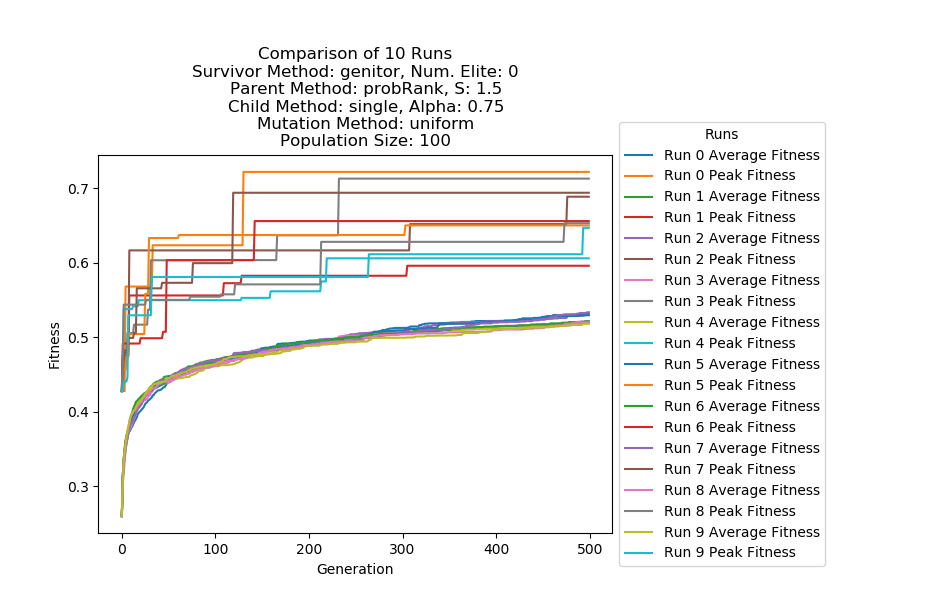

In [40]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

### Graphs for Combinations of Age + Elitism

#### Gaussian Mutation

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9007288977268942

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9002169138164569

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9210426857633035

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9102104143564084

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9156033098233681

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9120306808533041

Starting Conditions: 0.4275876637736554
Final Conditions: 0.940752780149225

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9052550087210658

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9093094451511814

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9088477643547026



<IPython.core.display.Javascript object>


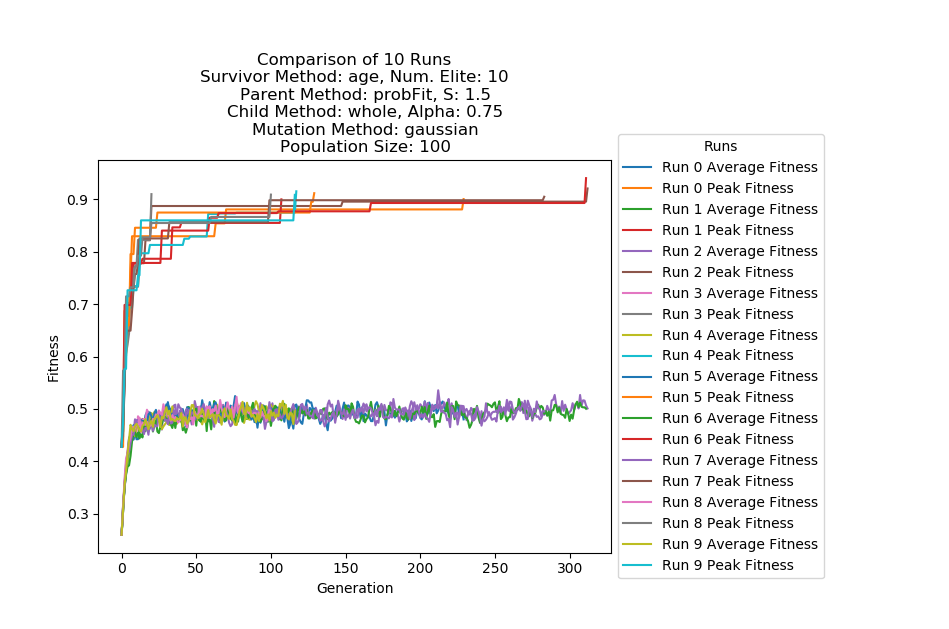

In [38]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9006434584632433

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9006663786240121

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9106494886300414

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9166617876189953

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9057372694559703

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8865576164960292

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9033906115187115

Starting Conditions: 0.4275876637736554
Final Conditions: 0.882256446810419

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8977215468266089

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9271326942607925



<IPython.core.display.Javascript object>


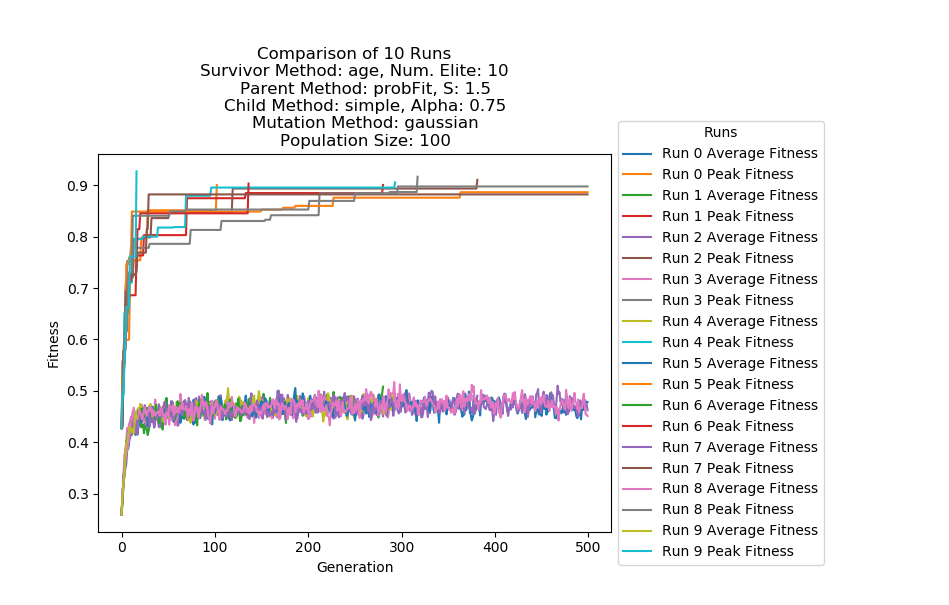

In [34]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8821261544580598

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9316015114353291

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8952506694976421

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9113976365178147

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9057323101723128

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9127327842544674

Starting Conditions: 0.4275876637736554
Final Conditions: 0.95320672395681

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9026229770441976

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8993162257107293

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9081350137431073



<IPython.core.display.Javascript object>


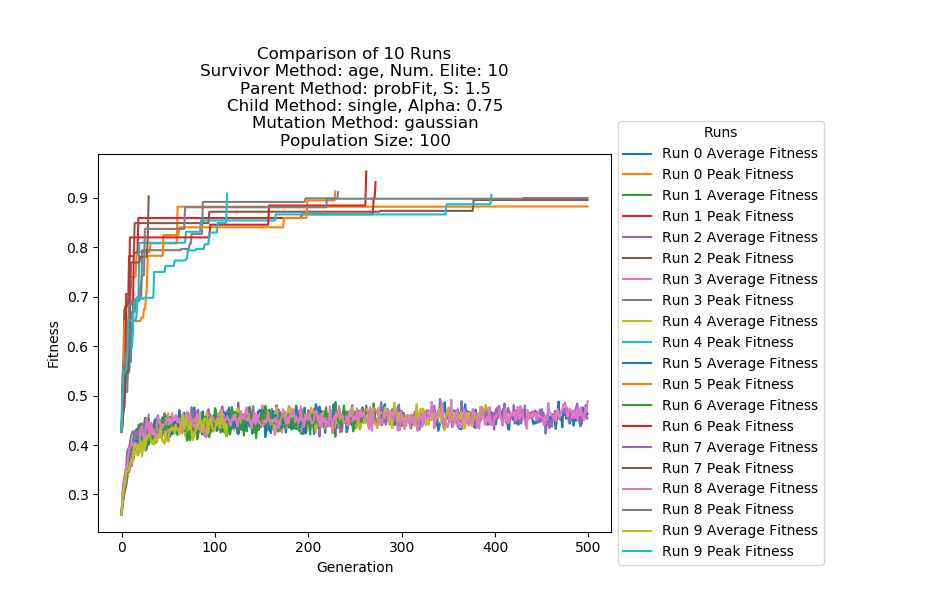

In [30]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8942485547817934

Starting Conditions: 0.4275876637736554
Final Conditions: 0.938955944558888

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9105839975361889

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9027654383312675

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9089106875662185

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9340963353401452

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9090933375355206

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9147752927298676

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9349174356267806

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8898337662677157



<IPython.core.display.Javascript object>


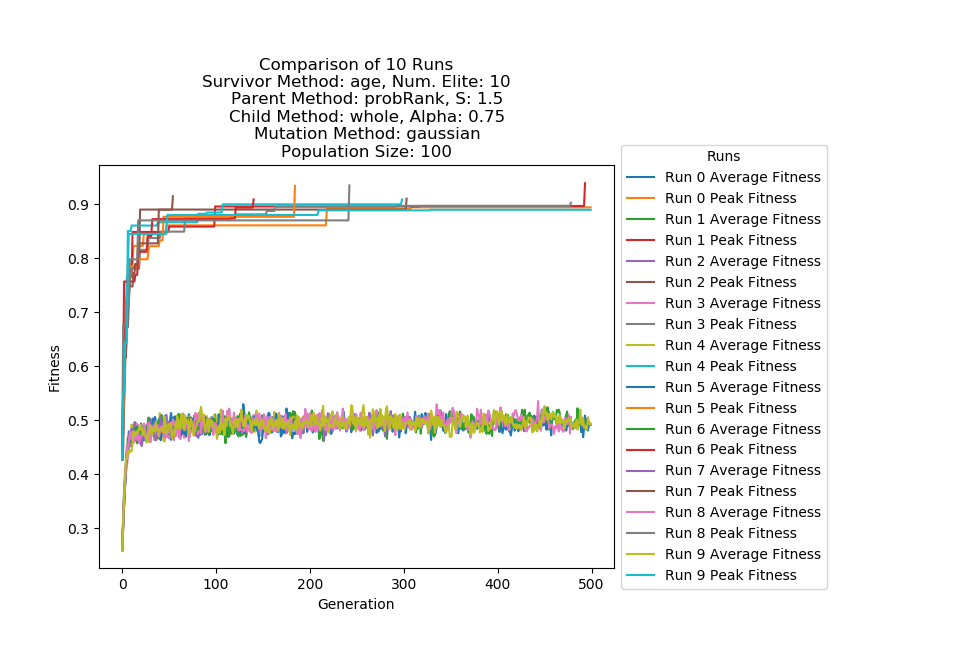

In [26]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9076714152347538

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9122861060464302

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8778984001463126

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9058983384249661

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9102578991740635

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8819234247295515

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9103753888276828

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8831243438302998

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8900643477827217

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8870053011987903



<IPython.core.display.Javascript object>


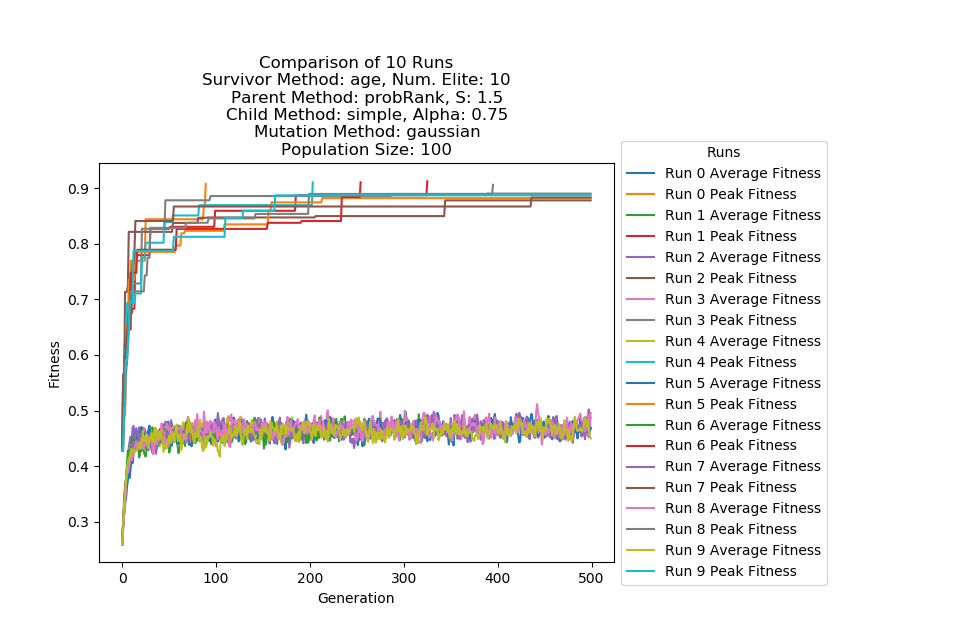

In [22]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9340321954475339

Starting Conditions: 0.4275876637736554
Final Conditions: 0.911842894148679

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8952803176968743

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9206276767647292

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9411885826318876

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8977676595392665

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8936958681445233

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9227280116322547

Starting Conditions: 0.4275876637736554
Final Conditions: 0.9001424064914211

Starting Conditions: 0.4275876637736554
Final Conditions: 0.8879902998273387



<IPython.core.display.Javascript object>


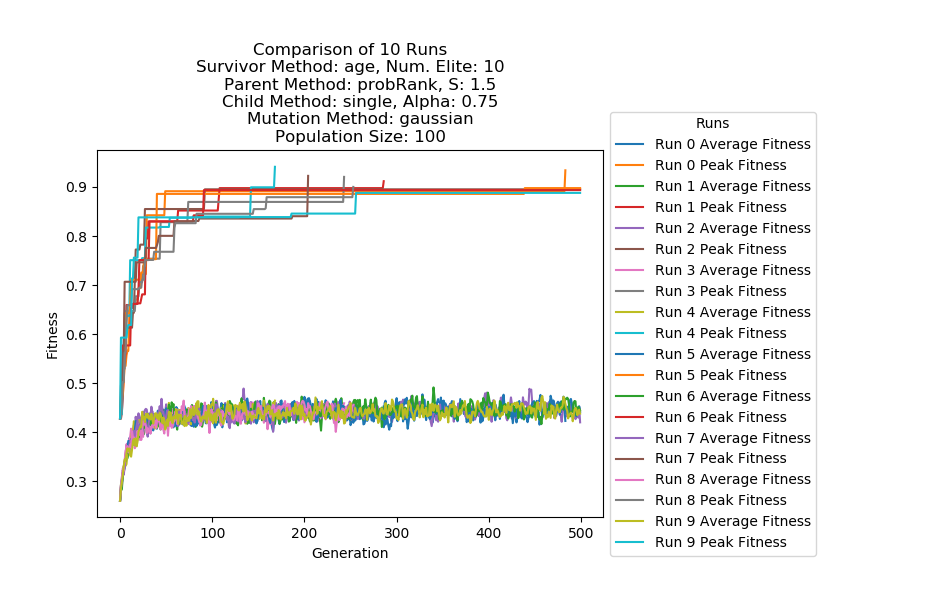

In [18]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

#### Uniform Mutation

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6265462783199832

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6392706667274101

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6783364806832052

Starting Conditions: 0.4275876637736554
Final Conditions: 0.704407940301645

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6932807091683256

Starting Conditions: 0.4275876637736554
Final Conditions: 0.789392726962219

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6121905612152421

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6744017699577891

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7256573459163861

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6406915520692563



<IPython.core.display.Javascript object>


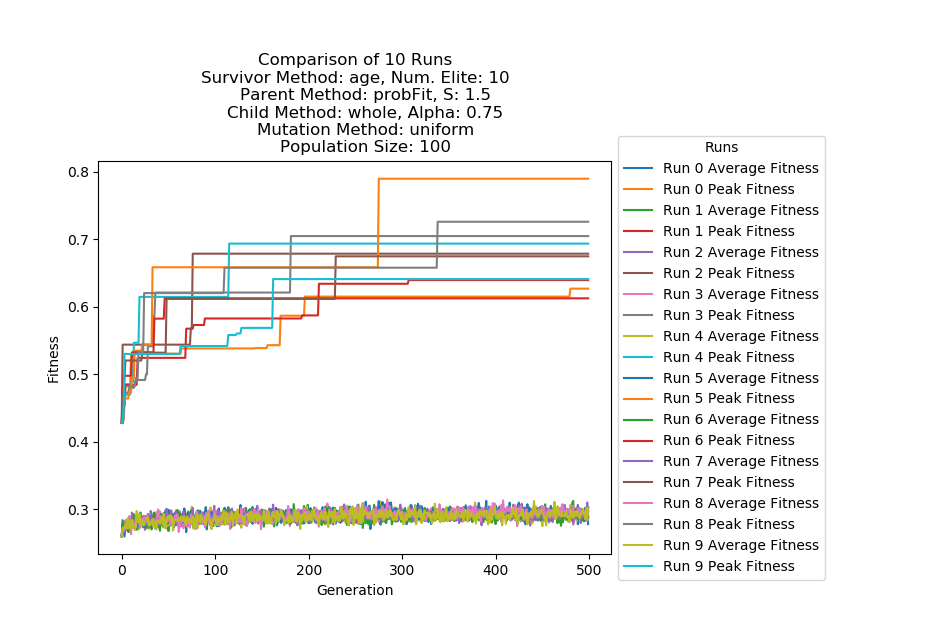

In [36]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7163118774766664

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6004683657129853

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7070230067184771

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7037783783214244

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6505302840191685

Starting Conditions: 0.4275876637736554
Final Conditions: 0.5882952056794145

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7053881055016276

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7337150971190438

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6447869995434693

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6674947863749995



<IPython.core.display.Javascript object>


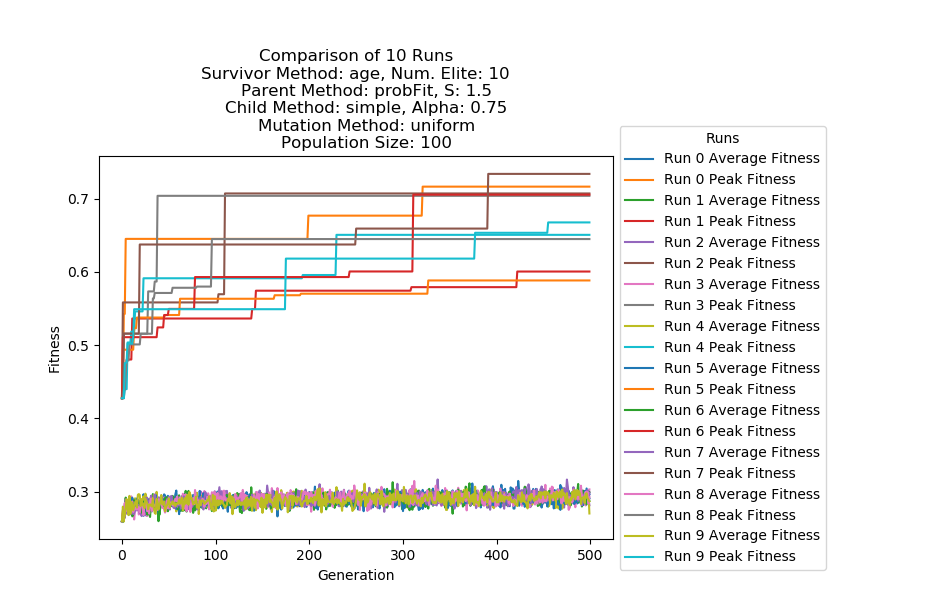

In [32]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6993330067157337

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6208125140966587

Starting Conditions: 0.4275876637736554
Final Conditions: 0.5877276123519697

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6519396404002678

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6964708225692303

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6405971988322536

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6698646712429513

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6292201495326505

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6744875710524609

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6708199248470677



<IPython.core.display.Javascript object>


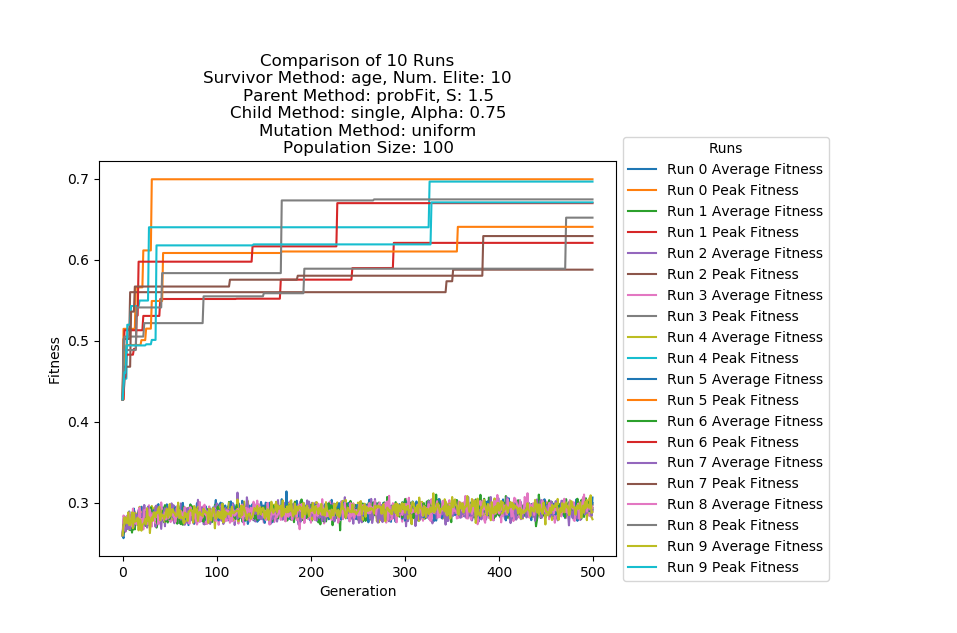

In [28]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6298364136385028

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6488819870950742

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6362882734088081

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6128958654008378

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6247787070771202

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7306352573672951

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6611014019559656

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7556736401451274

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6062401167153042

Starting Conditions: 0.4275876637736554
Final Conditions: 0.656781397208131



<IPython.core.display.Javascript object>


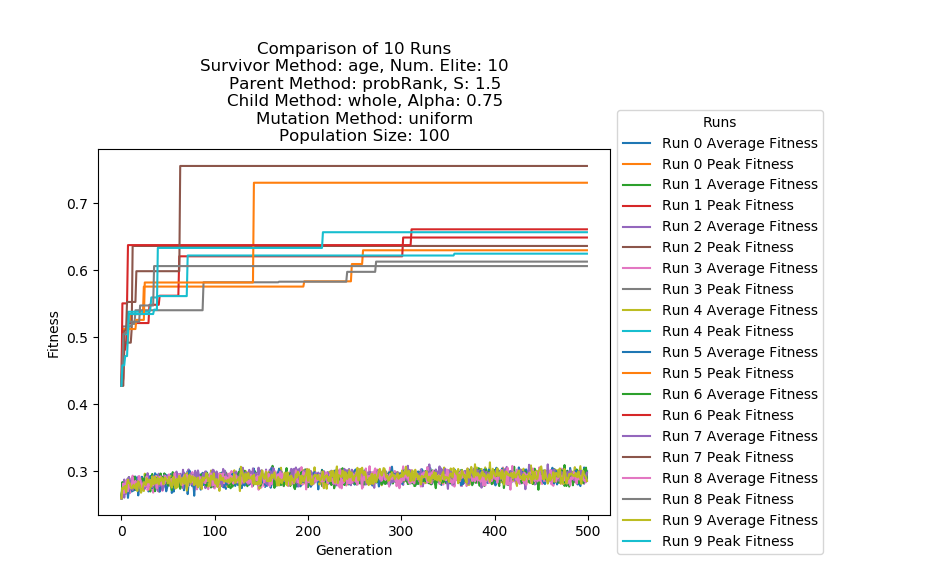

In [24]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6623011961751778

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7140842125514999

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7070019435684572

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6499741834134916

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6815761991954289

Starting Conditions: 0.4275876637736554
Final Conditions: 0.7245571640544288

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6728704349312706

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6412306912208222

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6207895733481439

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6705595951683228



<IPython.core.display.Javascript object>


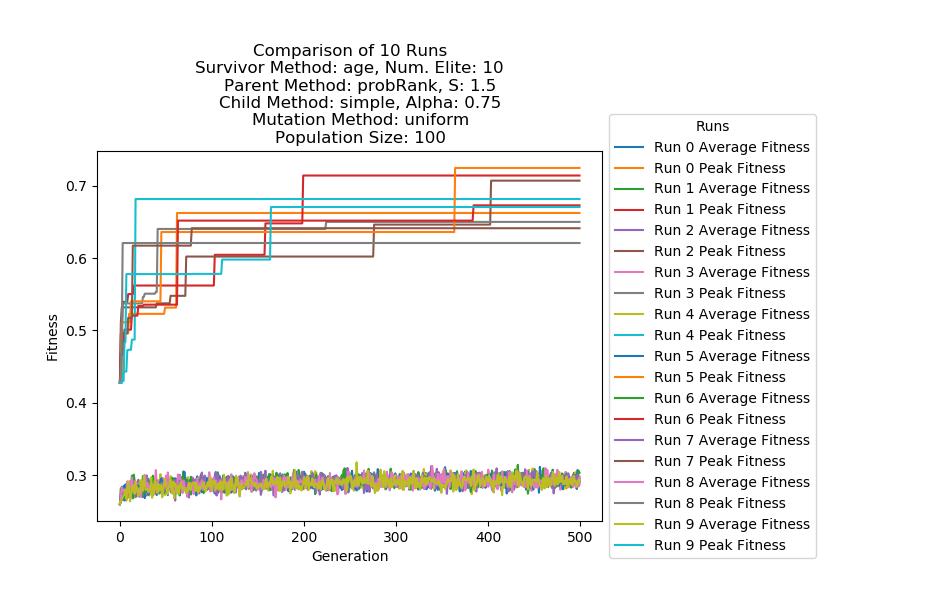

In [20]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6666130997252699

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6315000526931207

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6214272758815741

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6416903574601238

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6625901515642517

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6510797065839167

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6061302911373294

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6331731365360234

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6582100089855862

Starting Conditions: 0.4275876637736554
Final Conditions: 0.6686046231586837



<IPython.core.display.Javascript object>


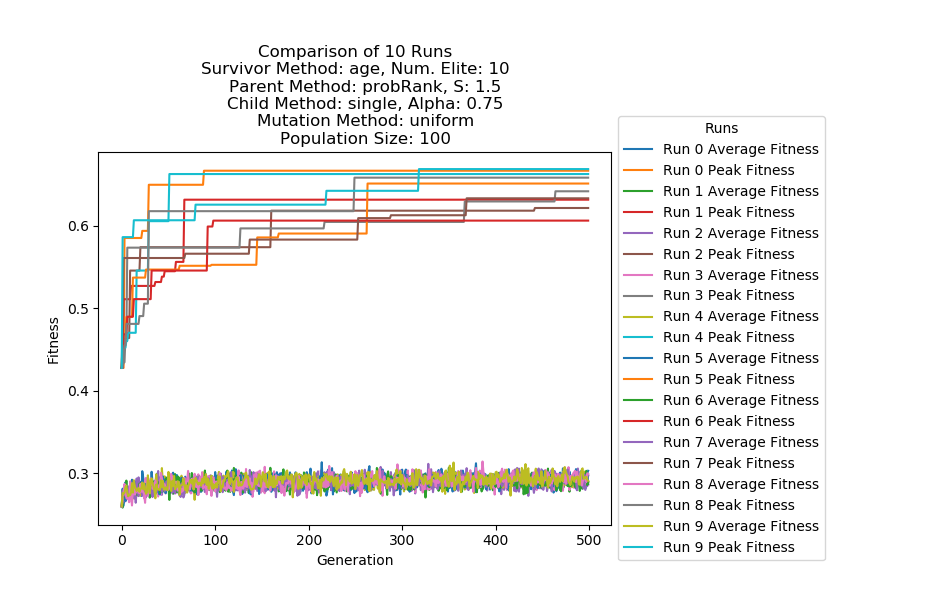

In [15]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

## Comparison of Average Performance with Different Initial Populations

### Age + Elitism Survivor Selection


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


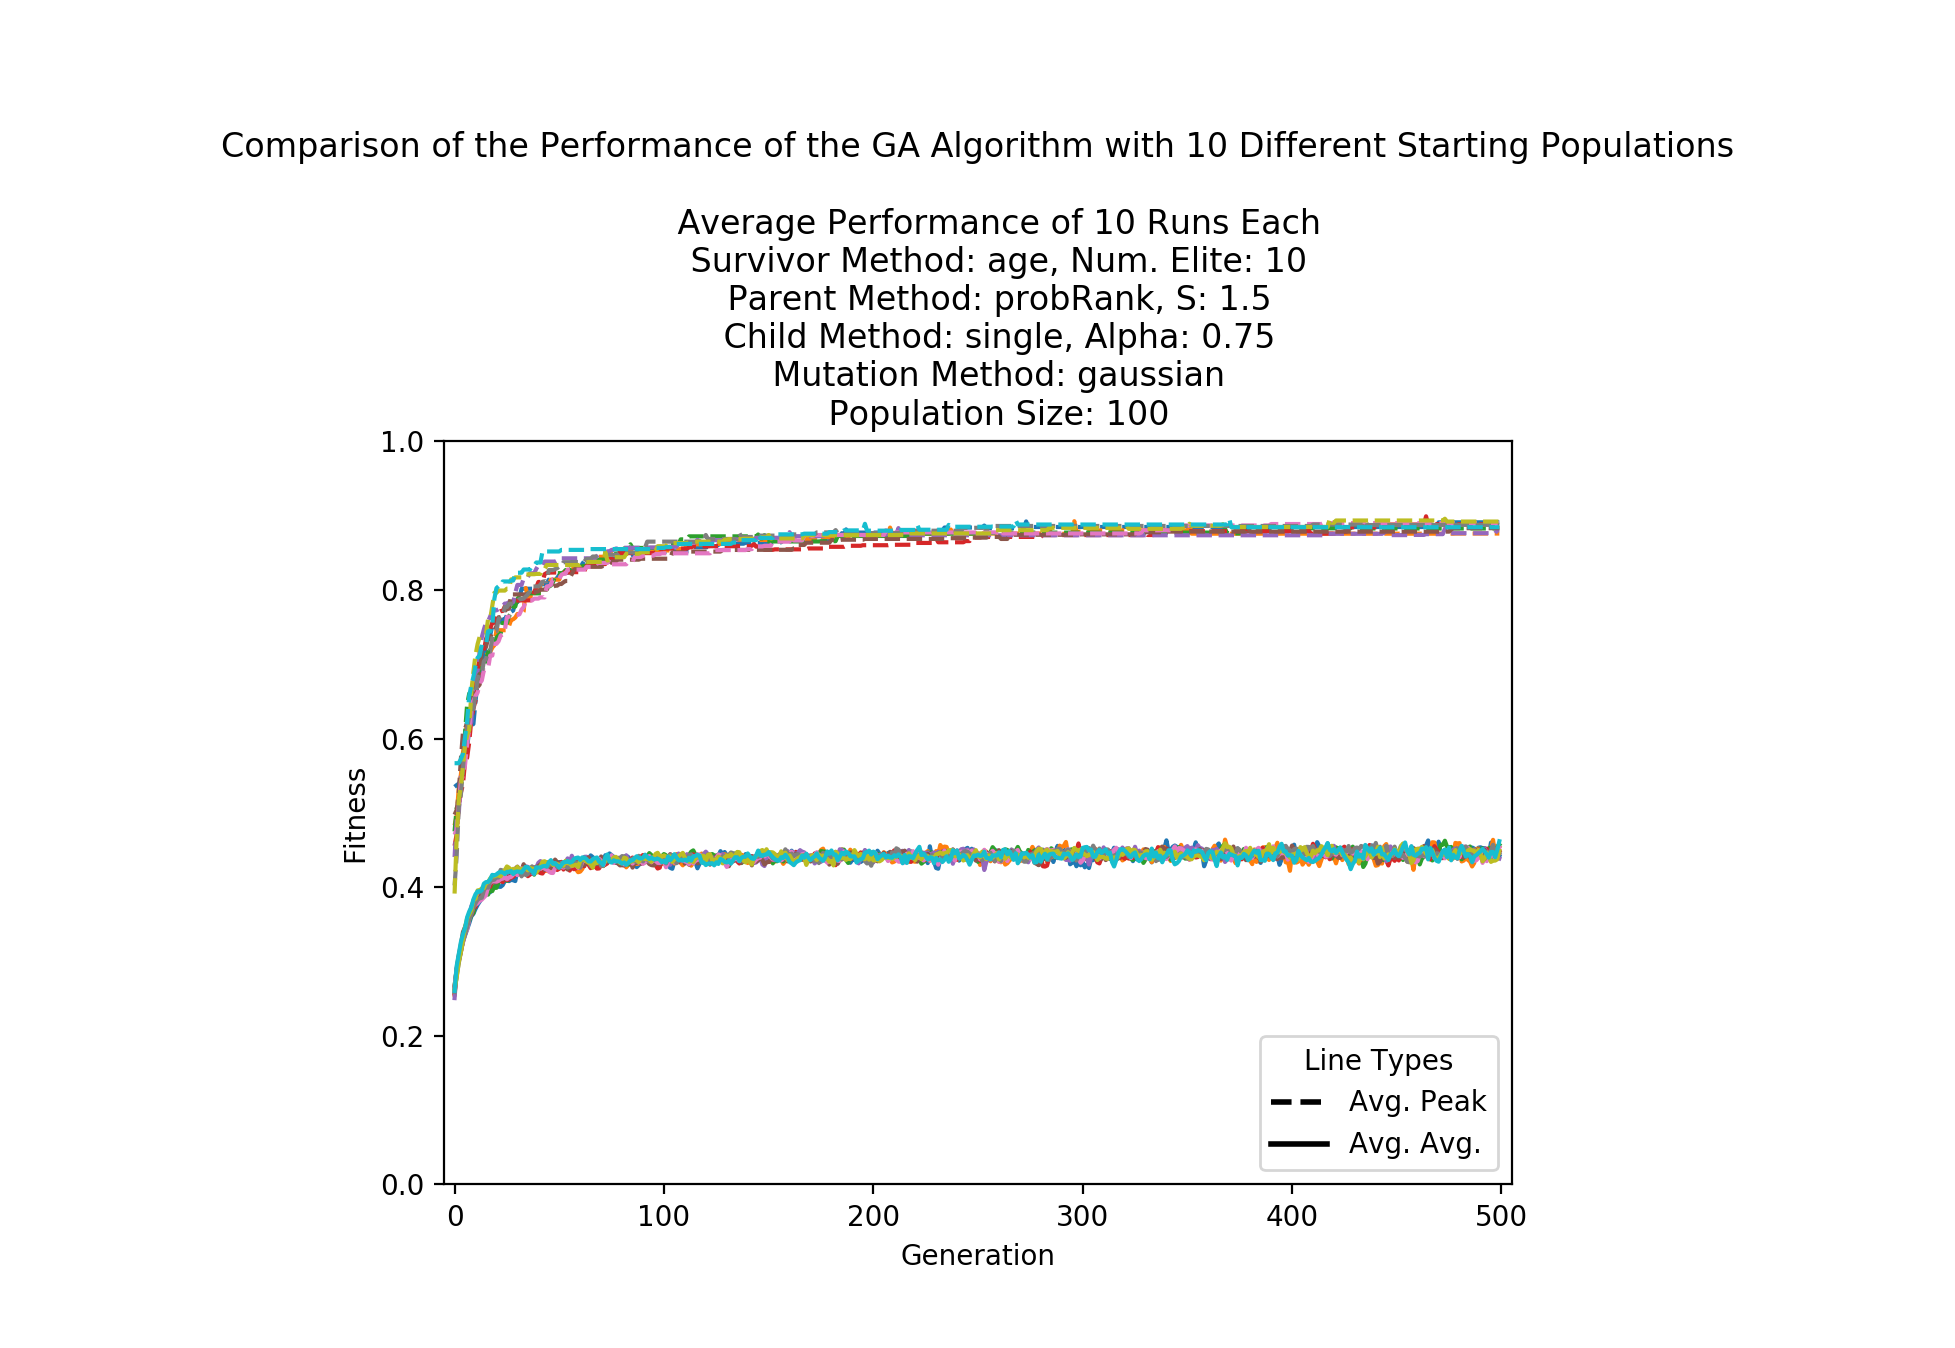

In [18]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "single", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


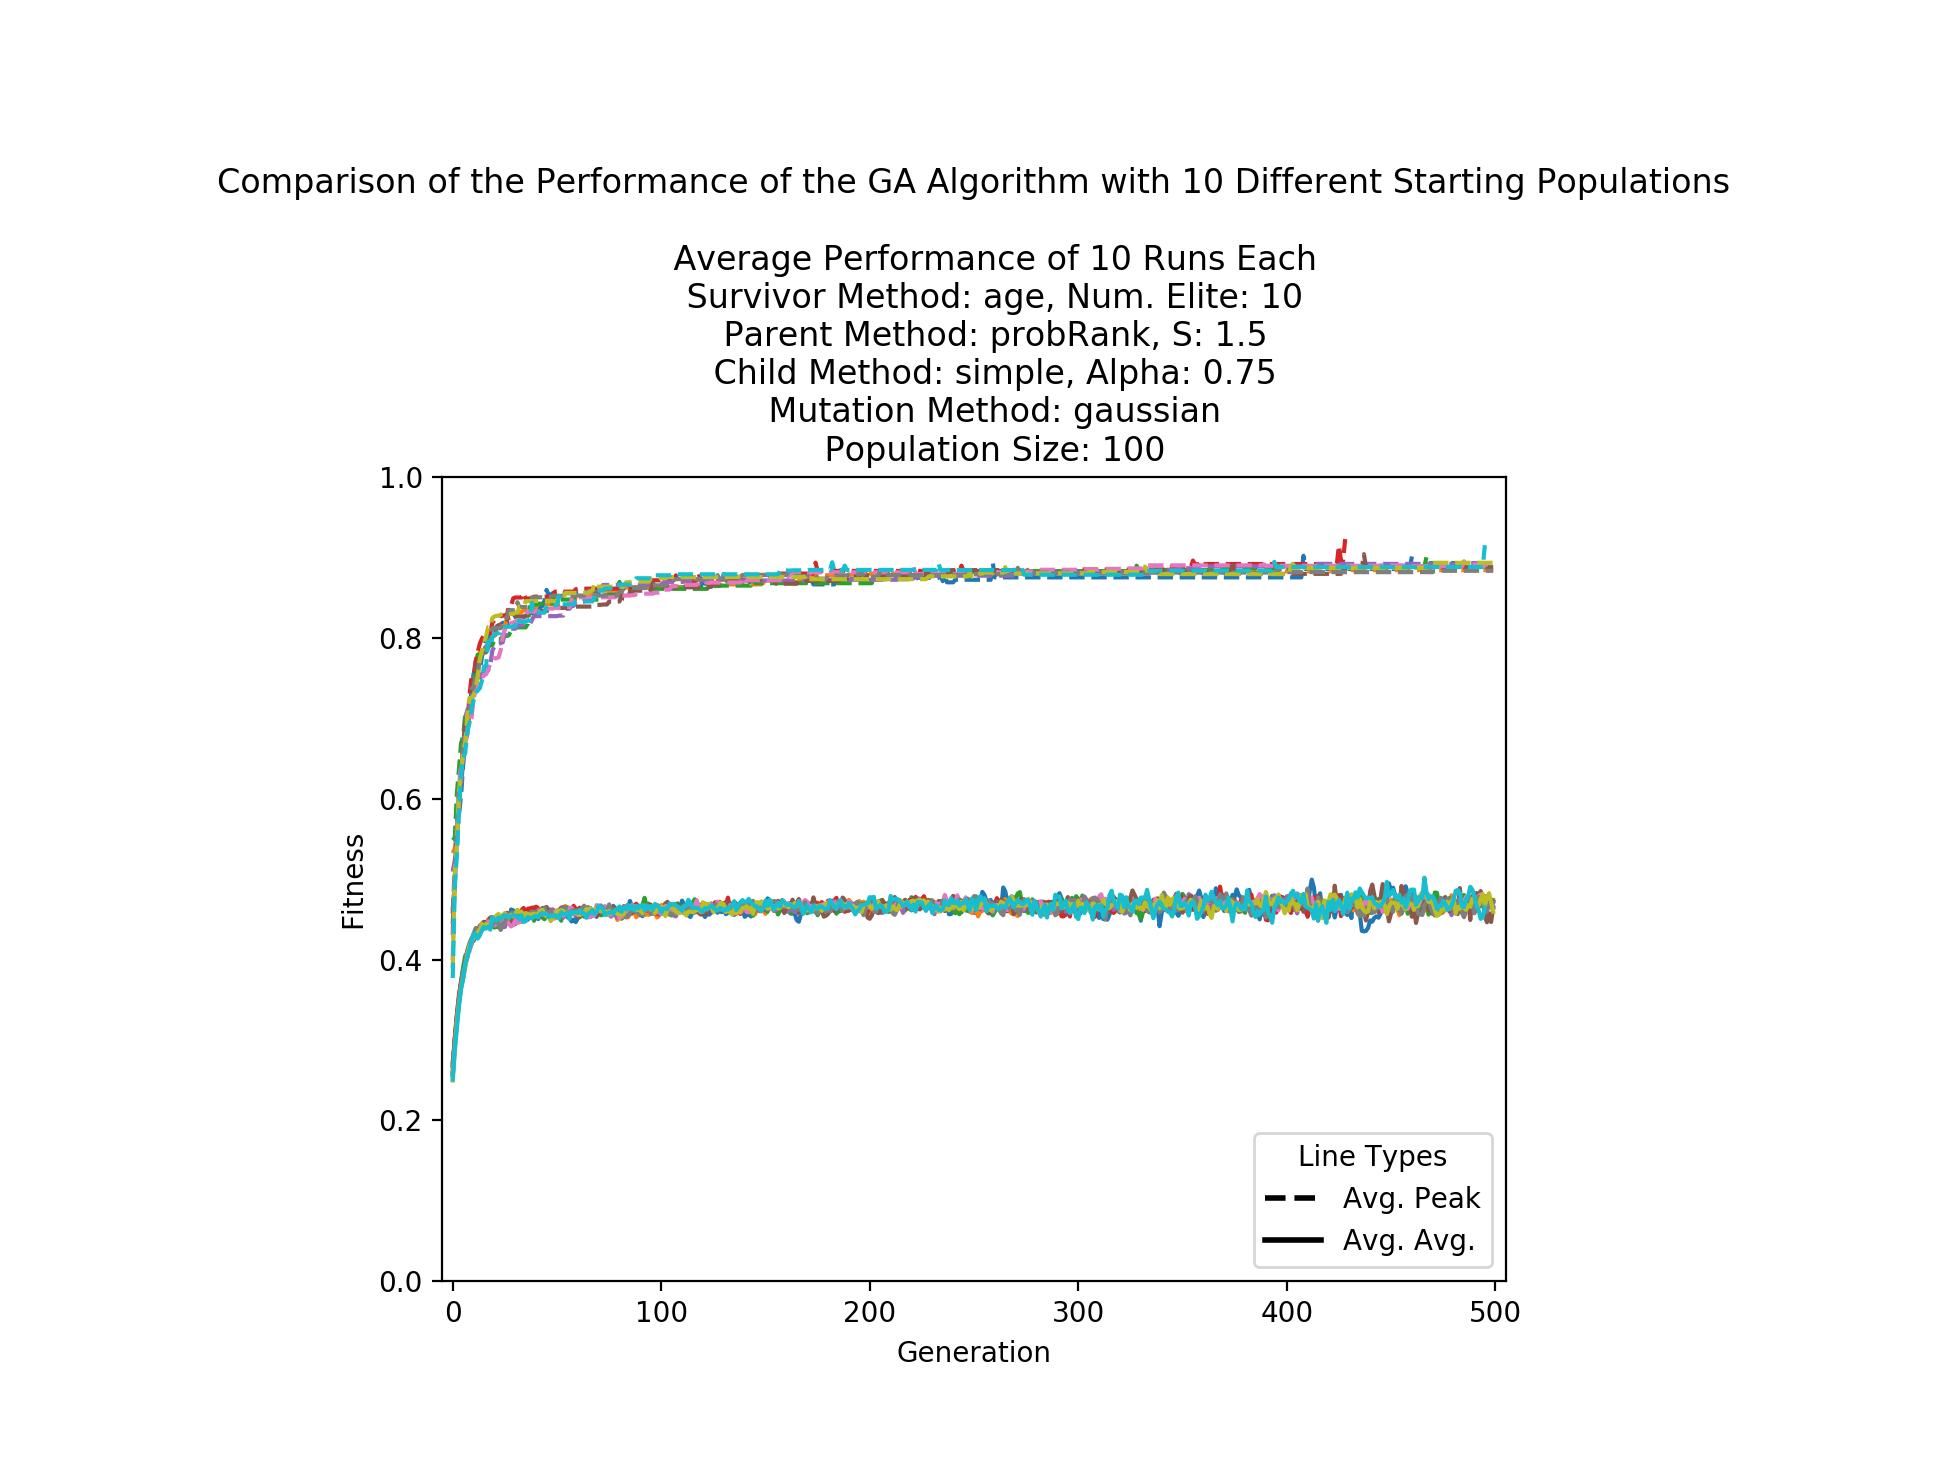

In [17]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "simple", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


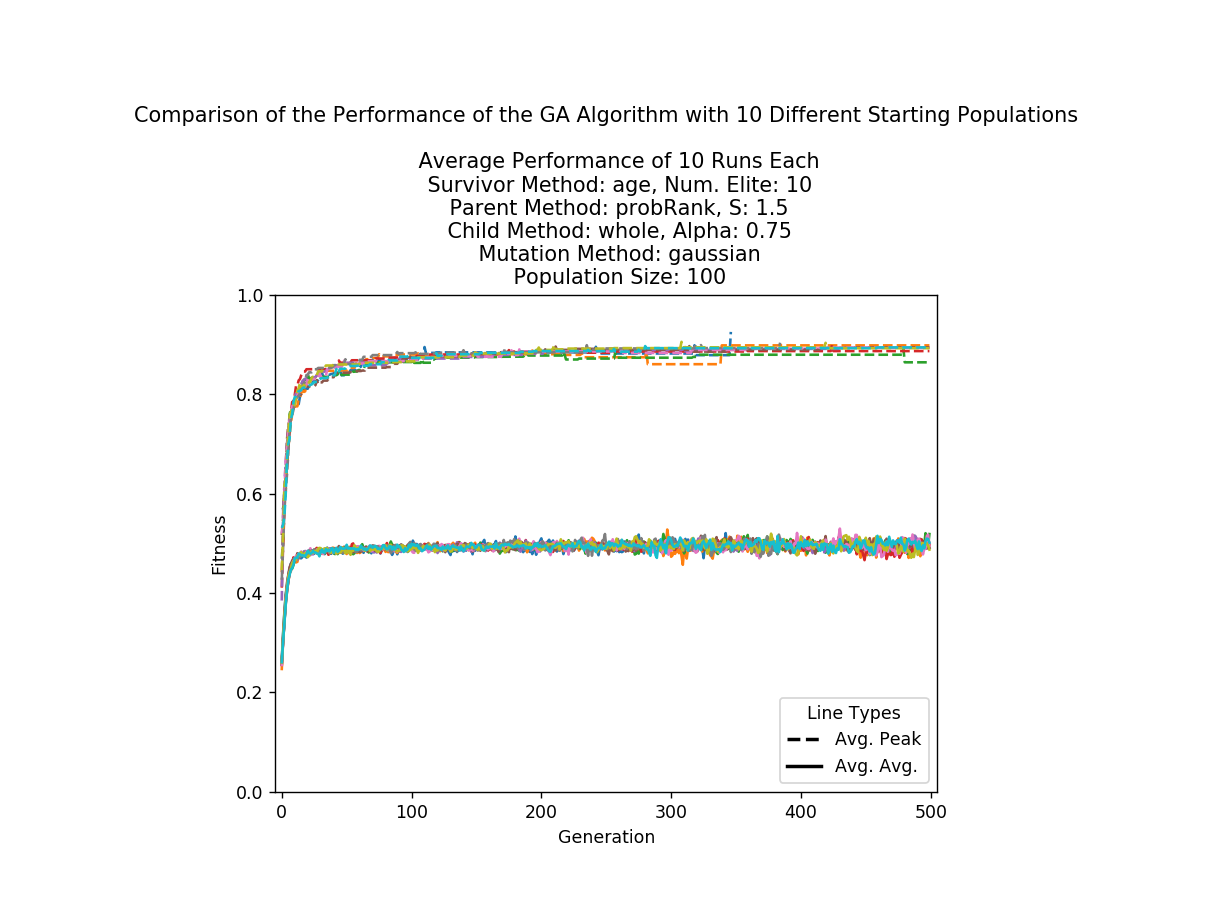

In [16]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "whole", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


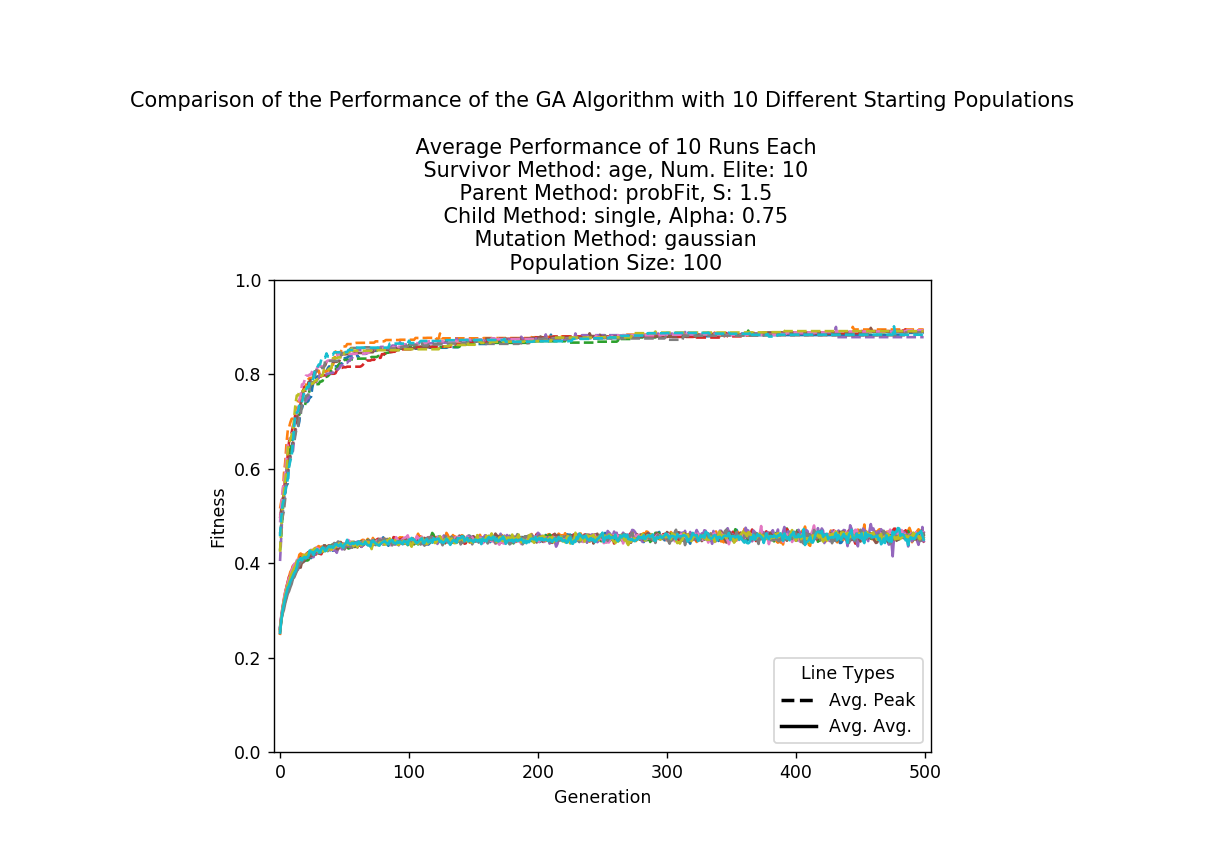

In [15]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "single", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


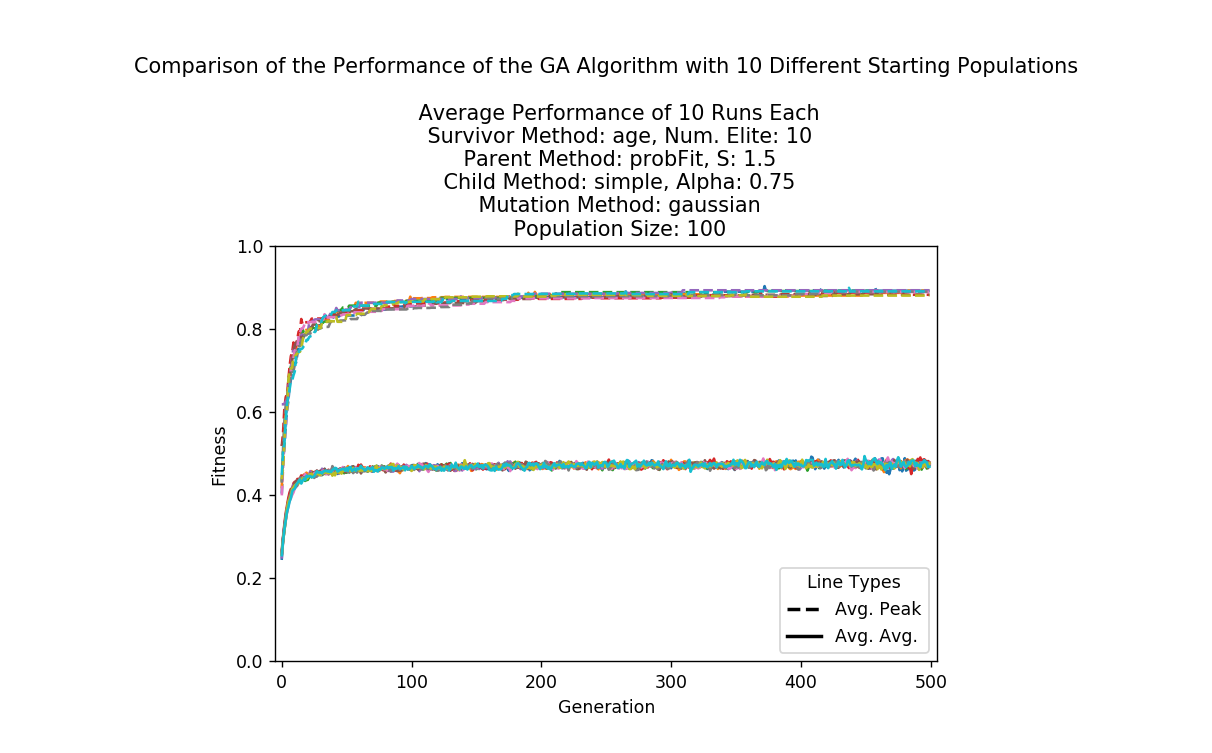

In [56]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "simple", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


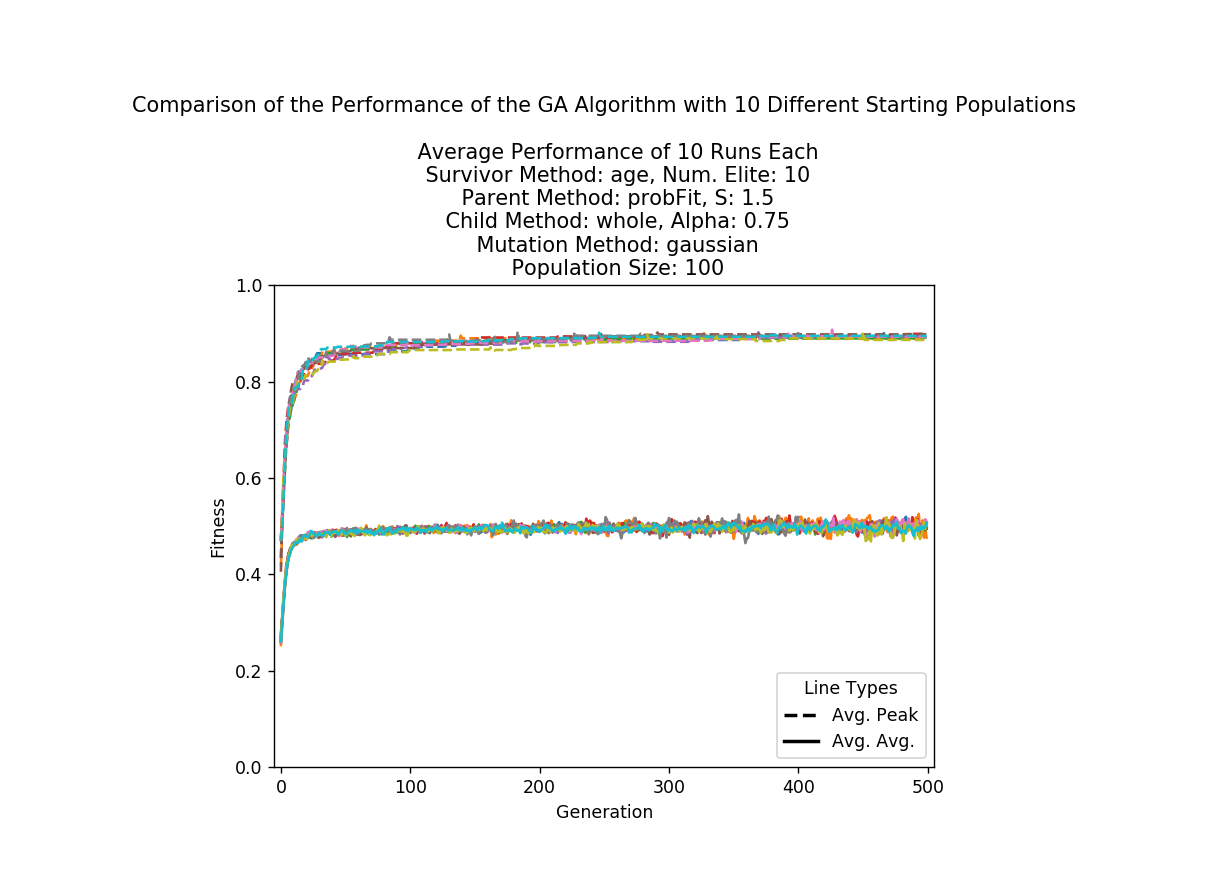

In [55]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "whole", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)

### Genitor Survivor Selection


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


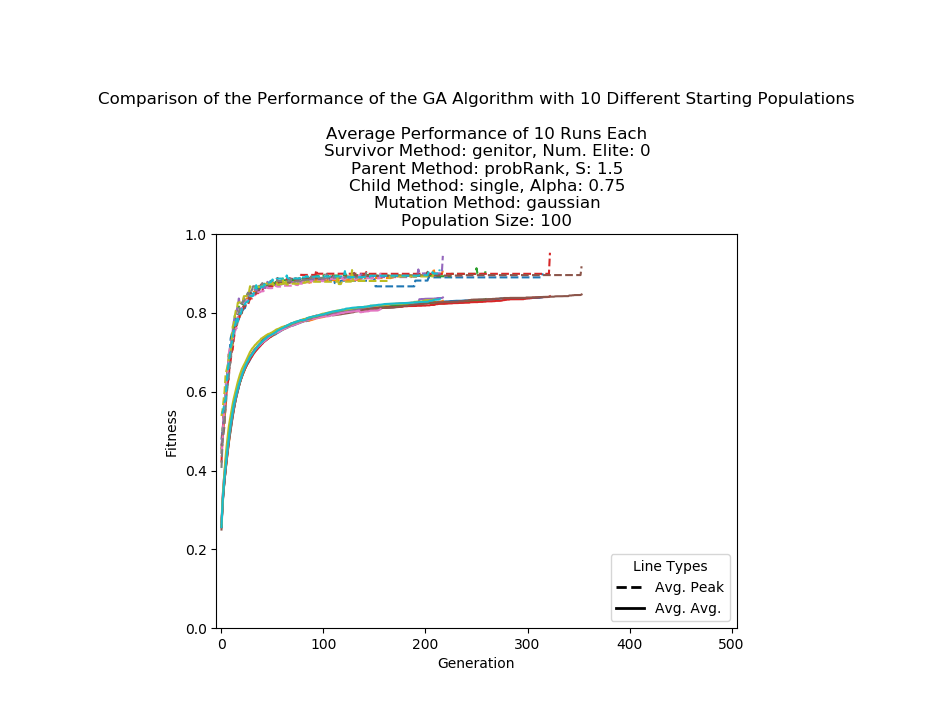

In [45]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "genitor", "nElite": 0},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "single", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


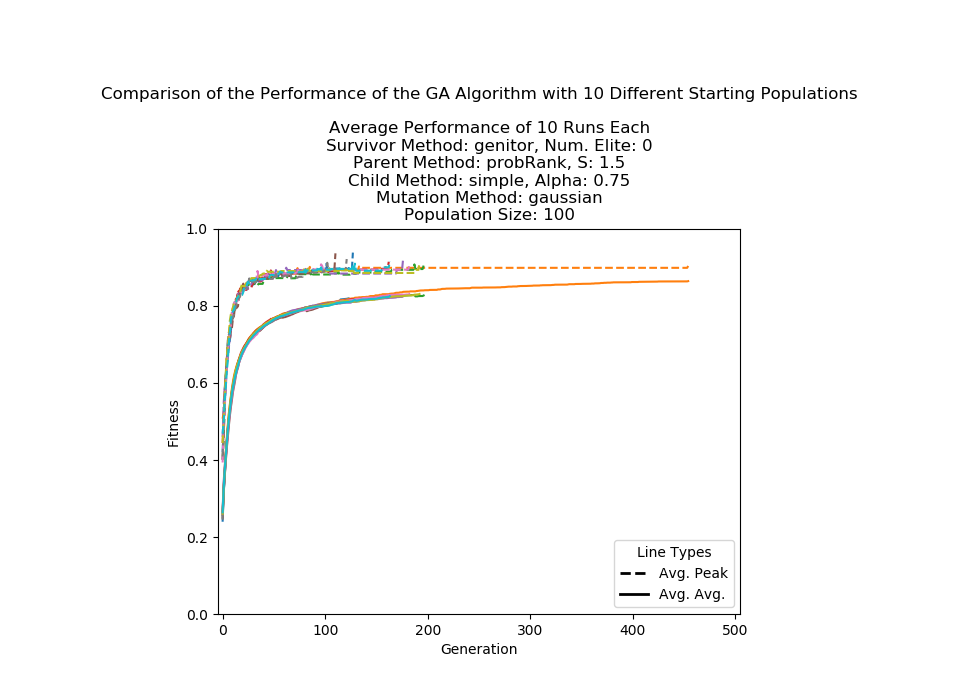

In [46]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "genitor", "nElite": 0},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "simple", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


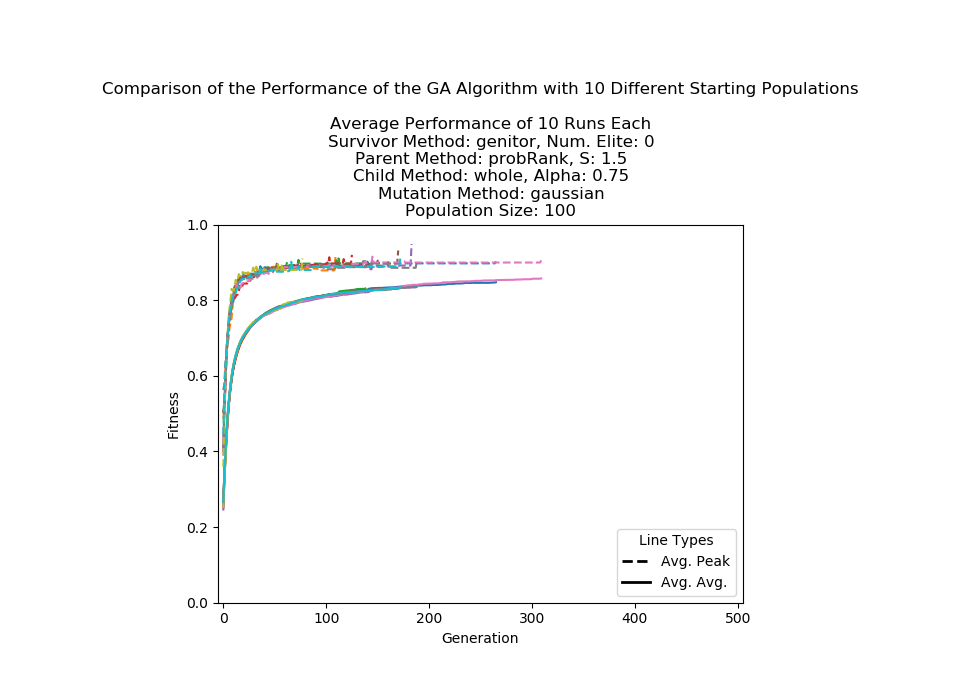

In [47]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "genitor", "nElite": 0},
             pMode = {"name": "probRank", "s": s},
             cMode = {"name": "whole", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


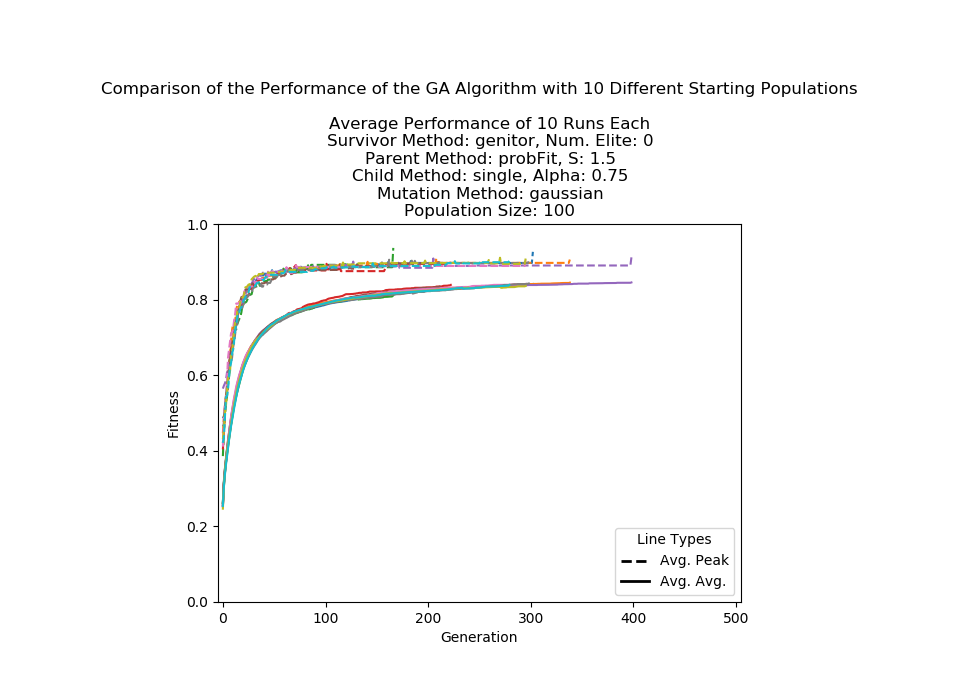

In [48]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "genitor", "nElite": 0},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "single", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


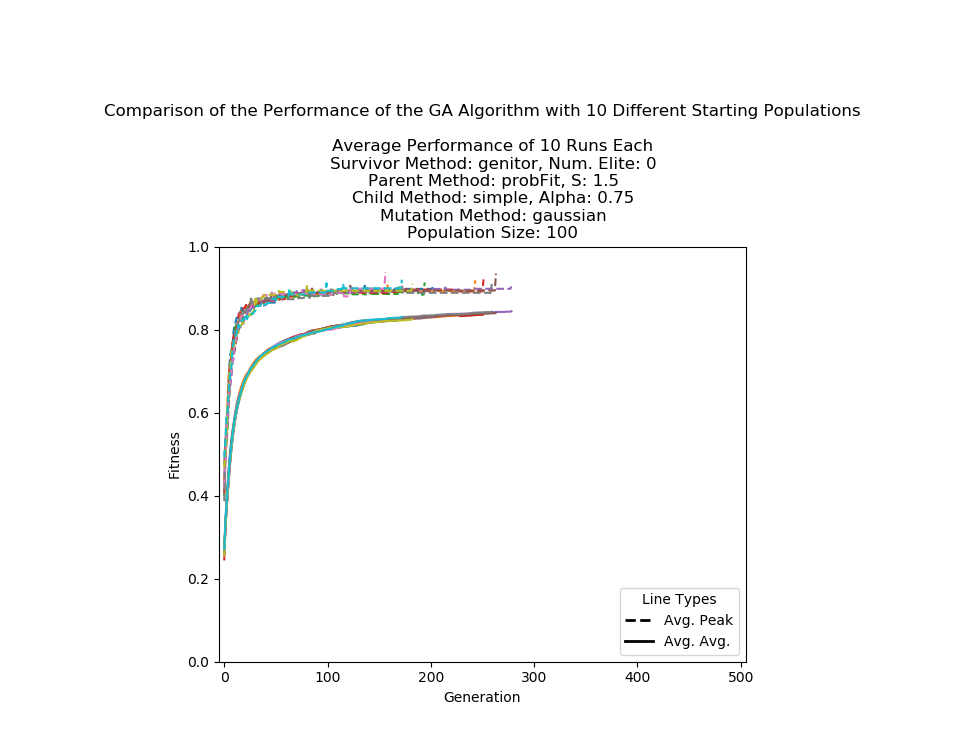

In [49]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "genitor", "nElite": 0},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "simple", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


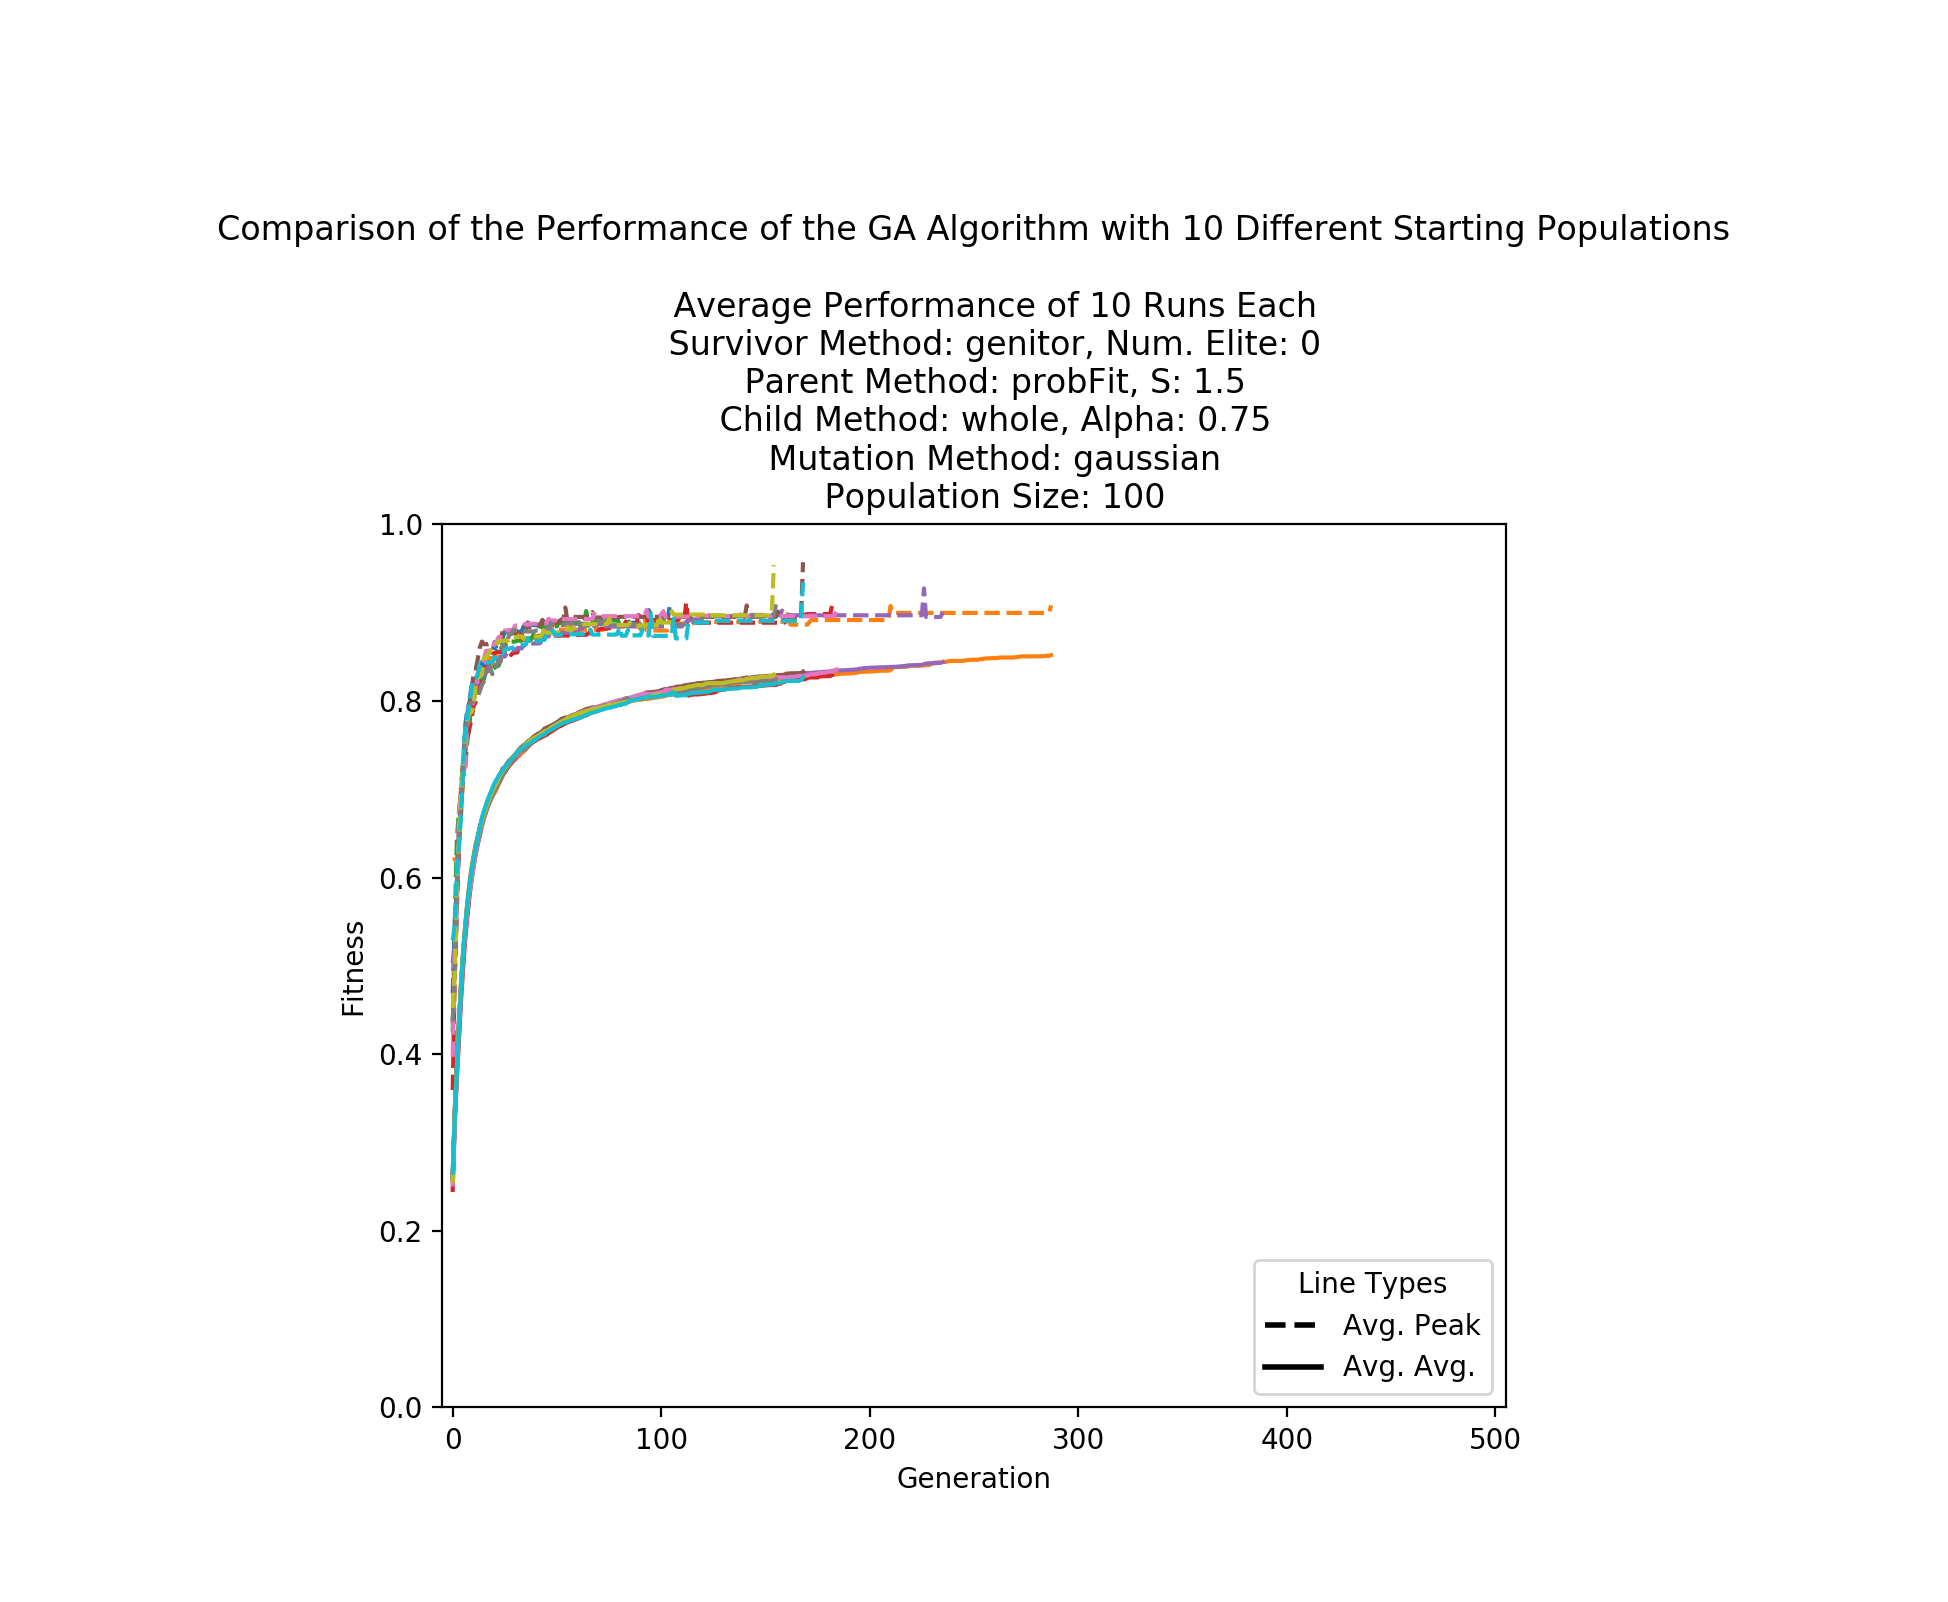

In [54]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "genitor", "nElite": 0},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "whole", "alpha": alpha},
             mMode = {"name": "gaussian"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)

### Best Uniform from Multi-run


population #0
Progress: [##########] (100.0 %)

population #1
Progress: [##########] (100.0 %)

population #2
Progress: [##########] (100.0 %)

population #3
Progress: [##########] (100.0 %)

population #4
Progress: [##########] (100.0 %)

population #5
Progress: [##########] (100.0 %)

population #6
Progress: [##########] (100.0 %)

population #7
Progress: [##########] (100.0 %)

population #8
Progress: [##########] (100.0 %)

population #9
Progress: [##########] (100.0 %)


<IPython.core.display.Javascript object>


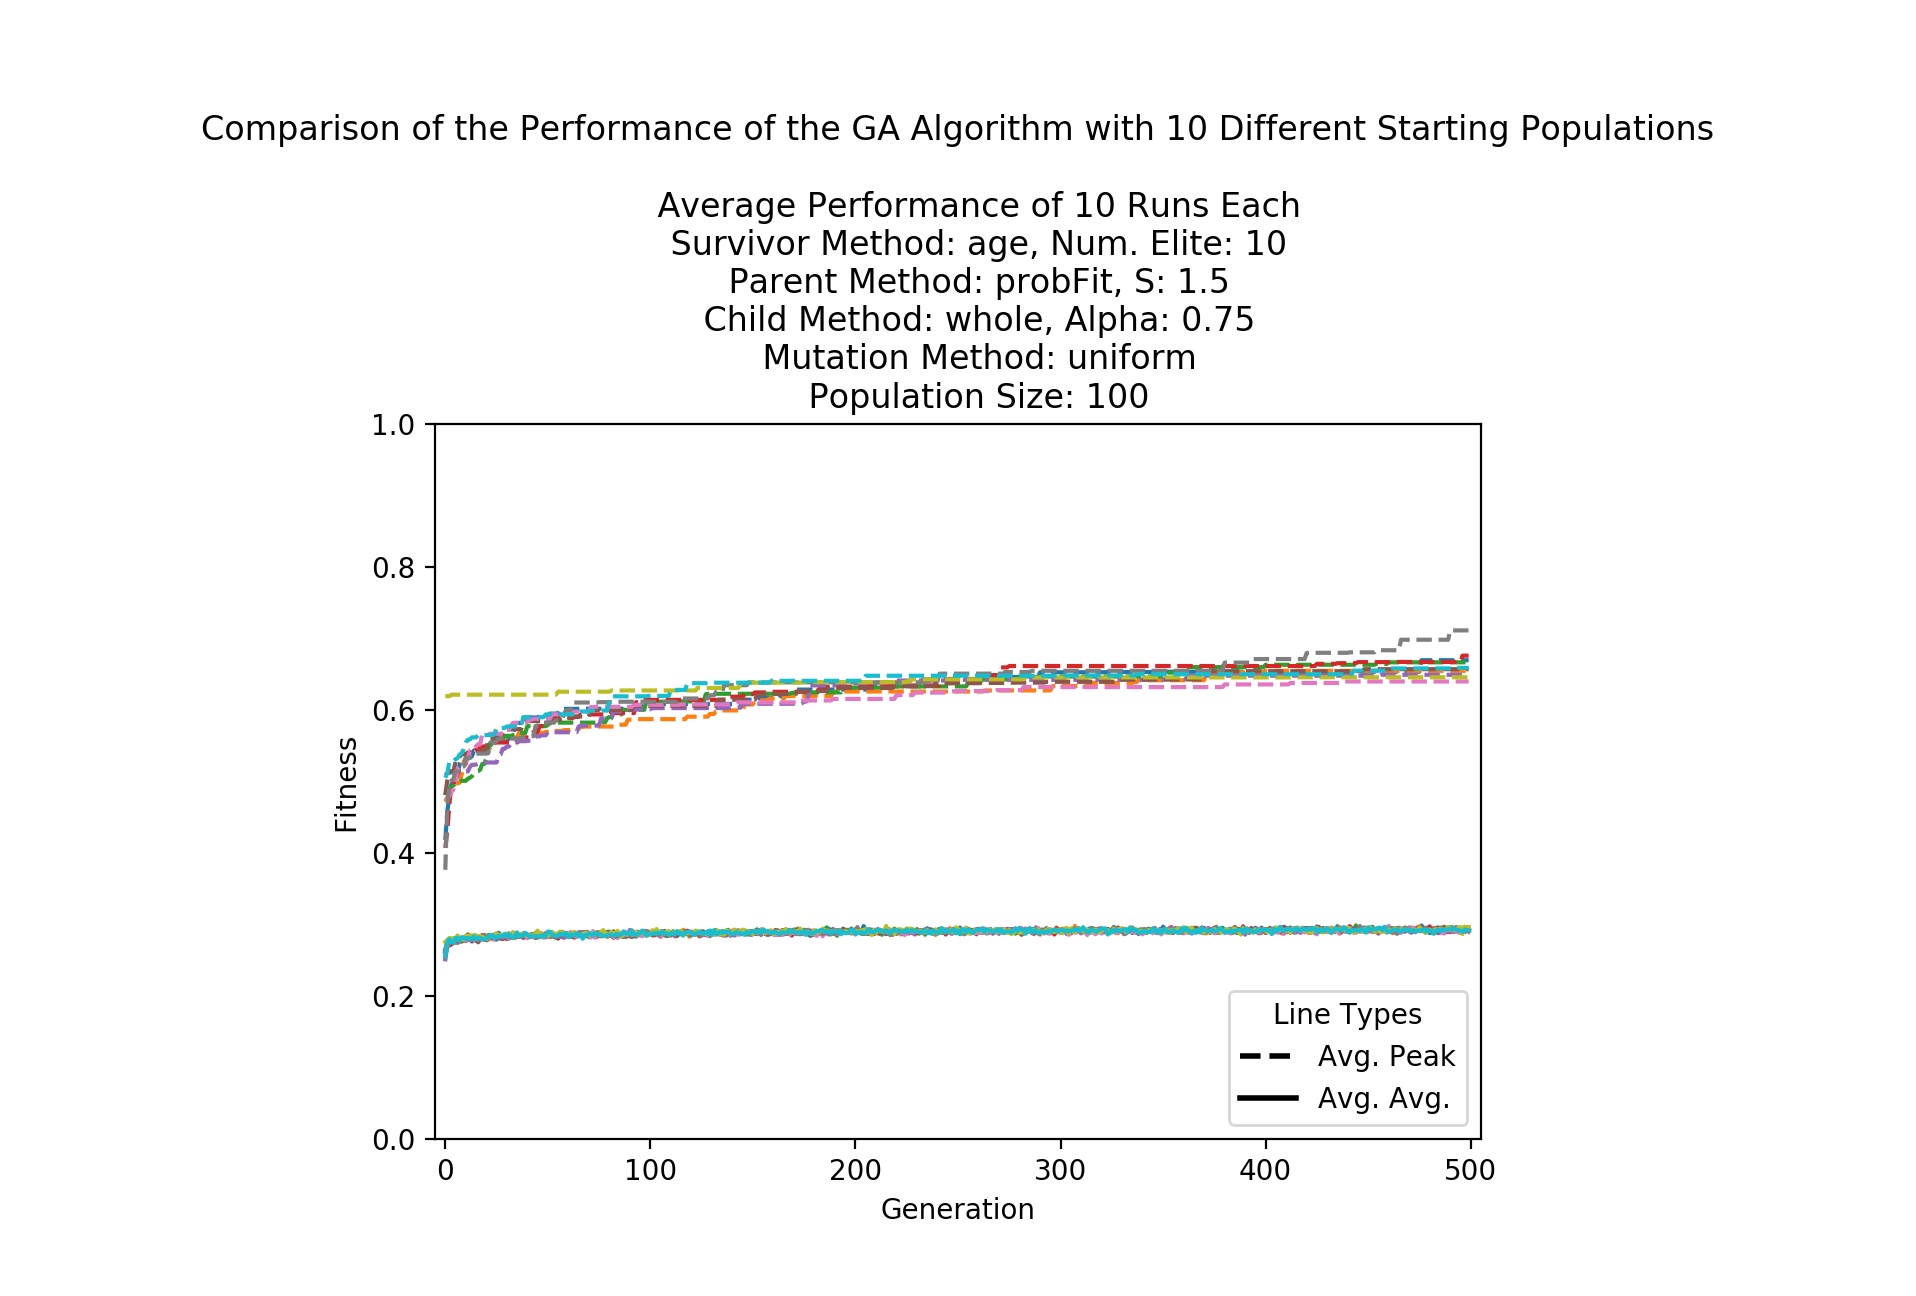

In [30]:
PlotDiffPops(numInitial = 10, runs = numRuns, generations = nGenerations, motors = motors,
             sMode = {"name": "age", "nElite": nElite},
             pMode = {"name": "probFit", "s": s},
             cMode = {"name": "whole", "alpha": alpha},
             mMode = {"name": "uniform"},
             fit = testFMode, 
             numPop = popSize,
             mkCSV = False,
             mkPickle = True)

## Scatter Matrix Plot

In [33]:
pklDirName = os.path.join(os.getcwd(), "pickle")
fileList = [f.name for f in os.scandir(pklDirName) if f.name.endswith('.pkl')]
fileList

['age10_probFit1.5_simple0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age10_probFit1.5_single0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age10_probFit1.5_whole0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age10_probFit1.5_whole0.75_uniform_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age10_probRank1.5_simple0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age10_probRank1.5_single0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age10_probRank1.5_whole0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl',
 'age2_probRank1.5_simple0.75_gaussian_PopS10_Gens400_InitPop1_RunsEach1.pkl',
 'age2_probRank1.5_simple0.75_gaussian_PopS10_Gens500_InitPop10_RunsEach1.pkl',
 'age2_probRank1.5_simple0.75_gaussian_PopS10_Gens500_InitPop1_RunsEach1.pkl',
 'age2_probRank1.5_simple0.75_gaussian_PopS10_Gens500_InitPop2_RunsEach1.pkl',
 'age2_probRank1.5_simple0.75_gaussian_PopS10_Gens500_InitPop3_RunsEach1.pkl',
 'age2_probRank1.5_simple0.75_u

In [43]:
#age10_probFit1.5_whole0.75_uniform_PopS100_Gens500_InitPop10_RunsEach10.pkl
fileName = os.path.join(pklDirName, fileList[3])
print(fileName)
df = pd.read_pickle(fileName)
df

C:\Users\becky\Documents\Programs\Python Scripts\JupyterNotebooks\GA4beamlines\pickle\age10_probFit1.5_whole0.75_uniform_PopS100_Gens500_InitPop10_RunsEach10.pkl


aveFitness peakFitness                                     peakParameters  \
0    0.295997    0.623683  [-0.3147595239008494, 0.014469946452170035, 0....   
1    0.300486     0.62258  [0.3658883764603873, 0.3351475599733842, -0.28...   
2    0.296103    0.703523  [-0.38316332984451407, 0.6429514206353728, 0.2...   
3    0.284729    0.704607  [0.13528287358719027, -1.0661327968517789, -0....   
4    0.280895    0.726626  [0.03988578545702204, -0.023113116319663618, -...   
..        ...         ...                                                ...   
95   0.288304    0.679445  [0.20800001185732064, 0.19071520935607467, 0.7...   
96   0.290967    0.678507  [0.44594820062143636, 0.17405687104216128, 3.6...   
97   0.291939     0.71923  [-0.33747151673743403, -0.8136826042157885, 0....   
98   0.296832    0.658088  [0.6116300061759272, 0.4295694585453669, -0.28...   
99   0.286588    0.699558  [0.032153046061659474, -0.056362425662292104, ...   

   generation  
0         500  
1         500  
2         500  
3         500  
4         500  
..        ...  
95        500  
96        500  
97        500  
98        500  
99        500  

[100 rows x 4 columns]

<IPython.core.display.Javascript object>


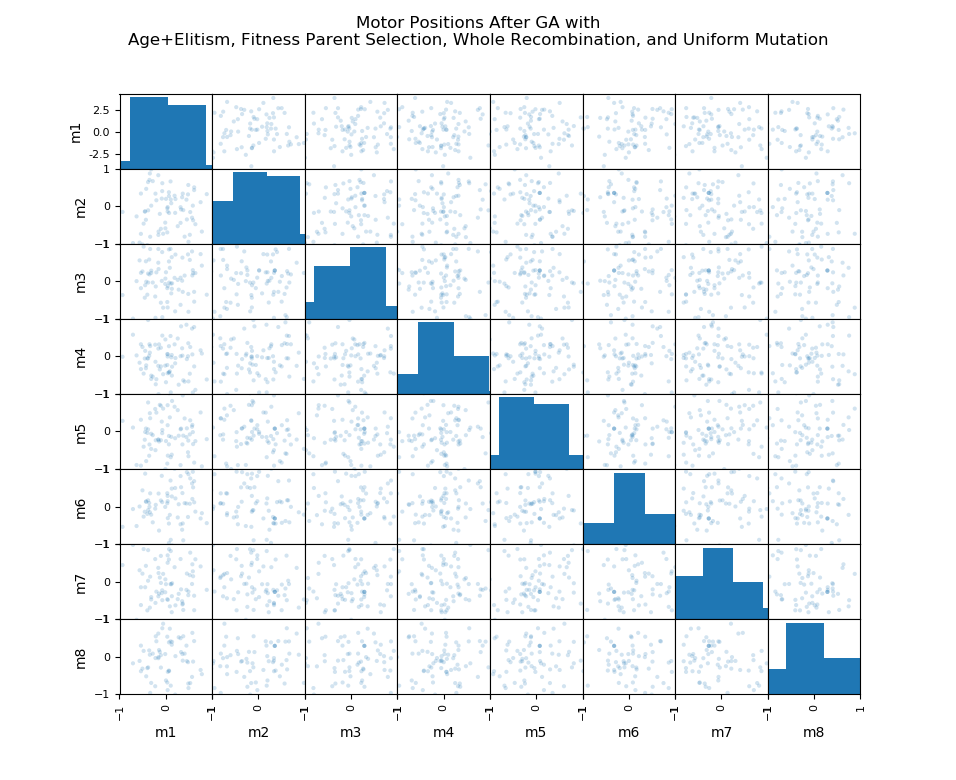

In [45]:
PlotScatterMatrix(motors = motors, df = df, 
    title = "Motor Positions After GA with\nAge+Elitism, Fitness Parent Selection, Whole Recombination, and Uniform Mutation")

In [41]:
#genitor0_probFit1.5_whole0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl
fileName = os.path.join(pklDirName, fileList[15])
print(fileName)
df = pd.read_pickle(fileName)
df

C:\Users\becky\Documents\Programs\Python Scripts\JupyterNotebooks\GA4beamlines\pickle\genitor0_probFit1.5_whole0.75_gaussian_PopS100_Gens500_InitPop10_RunsEach10.pkl


aveFitness peakFitness                                     peakParameters  \
0    0.748268    0.923436  [0.0006442684919181485, 0.03063778648772153, 0...   
1    0.798967    0.915568  [-0.1774395473205504, 0.04383086864671648, -0....   
2    0.813988    0.906312  [-0.10305381422601773, -0.5076636716598757, -0...   
3    0.703798    0.920184  [-0.17074676032971303, 0.2801549943437422, -0....   
4    0.745418    0.900165  [0.11826059872903114, 0.5928203677281461, 0.31...   
..        ...         ...                                                ...   
95   0.647609    0.922611  [-0.2667350931262687, -0.239186486377293, -0.1...   
96   0.789148    0.931277  [-0.14786468007937825, -0.008971518539239776, ...   
97   0.755224    0.910565  [-0.3329617669747055, -0.05116595257909601, -0...   
98   0.795357    0.930353  [-0.2665273509703581, 0.21436440716386695, 0.0...   
99   0.794658    0.903977  [-0.4967797671473072, 0.10112630485658894, 0.0...   

   generation  
0          35  
1          75  
2         105  
3          21  
4          36  
..        ...  
95         14  
96         67  
97         37  
98         81  
99         85  

[100 rows x 4 columns]

<IPython.core.display.Javascript object>


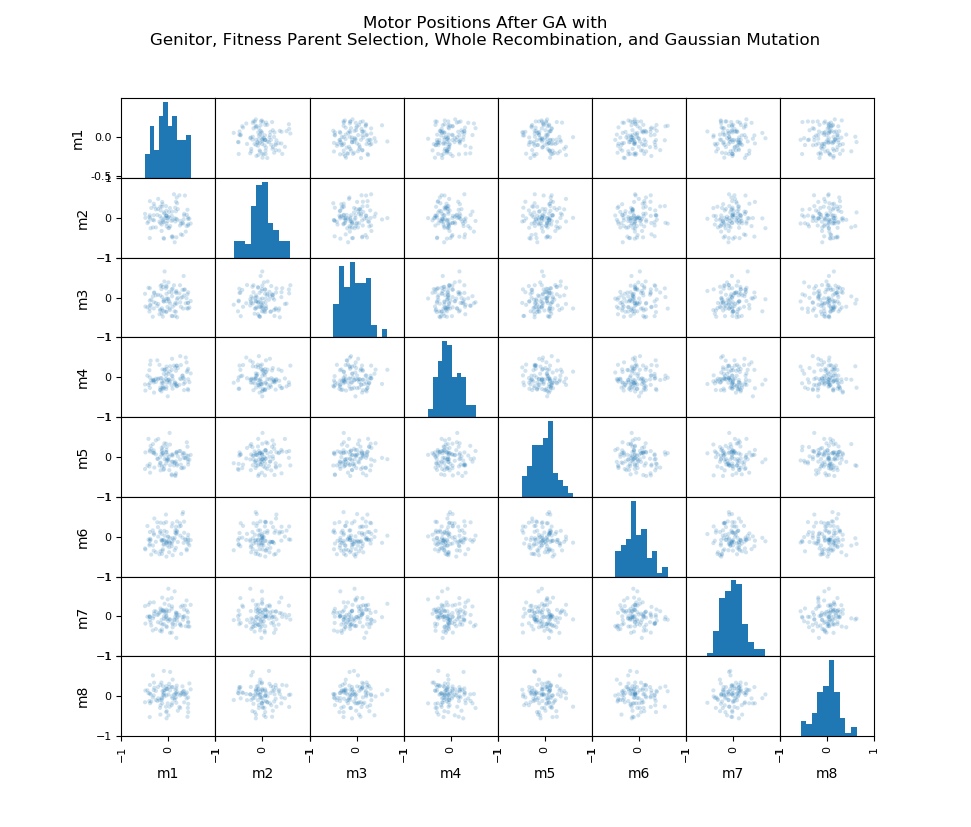

In [42]:
PlotScatterMatrix(motors = motors, df = df,
    title = "Motor Positions After GA with\nGenitor, Fitness Parent Selection, Whole Recombination, and Gaussian Mutation")

In [ ]:
'''In order to convert the csv files back to dataframes, have to do the following:

from ast import literal_eval
df = pd.read_csv(csvFileName)
df['peakParameters'] = df['peakParameters'].apply(literal_eval)
'''